# 데이터 정제, 분석 및 시각화

## 필요한 라이브러리 불러오기

- content폴더 아래 제출한 data폴더 속 파일들 넣어놓기

In [731]:
# 한글 폰트 설치
# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum

# 폰트를 matplotlib에 적용한다
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 만약 런타임 재가동 버튼이 발생하면 재가동 한다
# 2. [런타임] 메뉴에서 [런타임 다시 시작]을 선택한다.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
# 3. matplotlib의 폰트를 Nanum 폰트로 지정한다.
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')
# 폰트 설치된 위치
# /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

In [2]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import re
import os
import networkx as nx

In [3]:
# mecab 설치
!pip install konlpy

!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0  1389k      0 --:--:-- --:--:-- --:--:-- 1389k
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.

In [4]:
from konlpy.tag import Mecab
tokenizer = Mecab()

## 크롤링 데이터 정제

### 만나이

####유튜브

In [5]:
# 데이터 불러오기
youtube_df = pd.read_excel('/content/만나이_youtube.xlsx')
youtube_df.head(2)

,댓글내용,좋아요수,날짜
0,처음에는 혼란스러운게 당연하다 하지만 세월이 지나면 자연스럽게 해결되고 좋아질것이다...,3.3천,8개월 전
1,만나이로 바껴서 좀 한살한살 따지며 서열따지는 문화좀 완화 되었으면.. 사실 나이들...,484,8개월 전


In [6]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    3007 non-null   object
 1   좋아요수    1957 non-null   object
 2   날짜      3011 non-null   object
dtypes: object(3)
memory usage: 70.7+ KB


In [7]:
# 댓글내용 비어있는 행 삭제
tmp = youtube_df[youtube_df['댓글내용'].isnull()].index.tolist()
youtube_df.drop(tmp, inplace=True)

In [8]:
# 좋아요수 비어있는 부분 0으로 채움
youtube_df['좋아요수'] = youtube_df['좋아요수'].fillna('0')

In [9]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007 entries, 0 to 3010
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    3007 non-null   object
 1   좋아요수    3007 non-null   object
 2   날짜      3007 non-null   object
dtypes: object(3)
memory usage: 94.0+ KB


In [10]:
youtube_df['좋아요수'].unique()

array(['3.3천', '484', '353', '0', '755', '95', '1.4천', '208', '8', '440',
       '731', '253', '996', '466', '518', '363', '434', '111', '691',
       '367', '1.5천', '263', '325', '23', '671', '219', '28', '157',
       '238', '679', '373', '146', '62', '231', '80', '274', '336', '961',
       '4', '431', '7', '138', '190', '1', '5', '203', '279', '6', '3',
       '39', '297', '118', '2', '346', '31', '10', '106', '123', '9',
       '27', '46', '158', '55', '153', '16', '15', '19', '41', '12', '50',
       '82', '517', '17', '550', '394', '284', '13', '90', '250', '51',
       '178', '11', '92', '29', '25', '34', '45', '134', '36', '104',
       '115', '30', '187', '81', '18', '22', '32', '53', '60', '199',
       '38', '43', '20', '35', '47', '40', '14', '694', '2.1천', '729',
       '144', '271', '86', '366', '447', '37', '88', '229', '83', '70',
       '903', '102', '2천', '71', '165', '312', '170', '63', '84', '48',
       '42', '531', '58', '85', '66', '49', '26', '124', '73', '1.7천

In [11]:
youtube_df['날짜'].unique()

array(['8개월 전', '1개월 전', '8개월 전(수정됨)', '9개월 전', '9개월 전(수정됨)',
       '1개월 전(수정됨)', '7개월 전', '7개월 전(수정됨)', '9일 전(수정됨)', '4개월 전', '3주 전',
       '5개월 전(수정됨)', '2개월 전', '10일 전', '8일 전', '10일 전(수정됨)', '9일 전',
       '6일 전', '4일 전', '7일 전', '5일 전', '8일 전(수정됨)', '5일 전(수정됨)',
       '6일 전(수정됨)', '4주 전', '4주 전(수정됨)', '3주 전(수정됨)', '13일 전', '2주 전',
       '2주 전(수정됨)', '12일 전', '6개월 전', '5개월 전', '6개월 전(수정됨)', '2개월 전(수정됨)',
       '3개월 전', '4개월 전(수정됨)', '11일 전', '3개월 전(수정됨)', '17시간 전', '24분 전'],
      dtype=object)

- 날짜 변환 (월까지만)
- 좋아요수 x.x천 -> 1000단위 숫자로 변환
- 텍스트 정제 

In [12]:
# 날짜 변환 
def todate(s):
    if '(수정됨)' in s:
        s = s.replace('(수정됨)', '')

    if '년 전' in s:
        s = 2023-int(s.replace('년 전', ''))
        s = str(s) + '01'
    elif '개월 전' in s:
        s = 13-int(s.replace('개월 전', ''))
        if s < 10:
            s = '0' + str(s)
        s = '2022' + str(s)
    elif '주 전' in s:
        s = s.replace('주 전', '')
        if int(s) == 1 : 
            s = '202301'
        else:
            s = '202212'
    elif '일 전' in s:
        s = s.replace('일 전', '')
        if int(s) >= 12:
            s = '202212'
        else:
            s = '202301'
    elif '시간 전' in s:
        s = s.replace('시간 전', '')
        s = '202301'
    elif '분 전' in s:
        s = s.replace('분 전', '')
        s = '202301'

    return s

youtube_df['날짜'] = youtube_df['날짜'].apply(lambda x: todate(x))

In [13]:
youtube_df['날짜'].unique()

array(['202205', '202212', '202204', '202206', '202301', '202209',
       '202208', '202211', '202207', '202210'], dtype=object)

In [14]:
youtube_df['날짜'].value_counts()

202212    1025
202205     868
202204     602
202301     429
202206      32
202208      15
202210      12
202207      10
202209       7
202211       7
Name: 날짜, dtype: int64

In [15]:
# 좋아요수 x.x천 -> 1000단위 숫자로 변환
def liketonum(s):
    if "천" in s:
        s = s.replace("천", '')
        s = float(s) * 1000
    elif "만" in s:
        s = s.replace("만", '')
        s = float(s) * 10000
    
    return int(s)

youtube_df['좋아요수'] = youtube_df['좋아요수'].apply(lambda x : liketonum(x))

In [16]:
youtube_df['좋아요수'].unique()

array([3300,  484,  353,    0,  755,   95, 1400,  208,    8,  440,  731,
        253,  996,  466,  518,  363,  434,  111,  691,  367, 1500,  263,
        325,   23,  671,  219,   28,  157,  238,  679,  373,  146,   62,
        231,   80,  274,  336,  961,    4,  431,    7,  138,  190,    1,
          5,  203,  279,    6,    3,   39,  297,  118,    2,  346,   31,
         10,  106,  123,    9,   27,   46,  158,   55,  153,   16,   15,
         19,   41,   12,   50,   82,  517,   17,  550,  394,  284,   13,
         90,  250,   51,  178,   11,   92,   29,   25,   34,   45,  134,
         36,  104,  115,   30,  187,   81,   18,   22,   32,   53,   60,
        199,   38,   43,   20,   35,   47,   40,   14,  694, 2100,  729,
        144,  271,   86,  366,  447,   37,   88,  229,   83,   70,  903,
        102, 2000,   71,  165,  312,  170,   63,   84,   48,   42,  531,
         58,   85,   66,   49,   26,  124,   73, 1700, 2400,  918,  156,
        543,  756,  513,  197,  149,  148,  374,  5

In [17]:
youtube_df = youtube_df.astype({'좋아요수':'int'})

In [18]:
# '댓글내용' 텍스트 정제 

def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글 + 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

youtube_df['댓글내용'] = youtube_df['댓글내용'].apply(lambda x : reg(x))

In [19]:
youtube_df.head(2)

,댓글내용,좋아요수,날짜
0,처음에는 혼란스러운게 당연하다 하지만 세월이 지나면 자연스럽게 해결되고 좋아질것이다...,3300,202205
1,만나이로 바껴서 좀 한살한살 따지며 서열따지는 문화좀 완화 되었으면 사실 나이들어보...,484,202205


In [20]:
# mecab으로 명사추출
youtube_data_mecab = youtube_df.copy()
youtube_data_mecab['댓글내용'] = youtube_data_mecab['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
youtube_data_mecab['댓글내용']

0                     처음 혼란 게 세월 자연 해결 것 우리 세대 때 그때 시작 필요
1       만나 이로 바 살 살 서열 문화 완화 나이 나이 말 학생 학년 선배 후배 사회 존중...
2              처음 지번 주소 도로 주소 때 국민 혼란 도로 주소 자연 나이 이 자연 정착
3       가족 혈연관계 형 언니 누나 오빠 호칭 사용 서양 수평 문화 형성 듯 선배 후배 선...
4                  이 합리 거 월 살 부분 거 이제 나이 서열 게 예전 중요 것 타이밍
                              ...                        
3006    사회 나이 때문 분쟁 걱정 사람 나이 값 팔 년 사회 내 능력 힘 나이 대우 시대 ...
3007    적 우리 시골 마을 명 친구 선후배 나이 나 살 형 명 동갑 명 그 나 년 선배 당...
3008                                    나이 서열 세분 것 난 세 개월
3009    이것 신체 나이 정신 나이 중요 연나 한국 나이 가중 숫자 대여 대 건강 젊은이 대...
3010                                            년 술 수 거 거
Name: 댓글내용, Length: 3007, dtype: object

In [21]:
def change_text(t):
    if '자연' in t:
        t = t.replace('자연', '자연스럽게')
    return t

youtube_data_mecab['댓글내용'] = youtube_data_mecab['댓글내용'].apply(lambda x : change_text(x))   
youtube_data_mecab['댓글내용']

0                  처음 혼란 게 세월 자연스럽게 해결 것 우리 세대 때 그때 시작 필요
1       만나 이로 바 살 살 서열 문화 완화 나이 나이 말 학생 학년 선배 후배 사회 존중...
2        처음 지번 주소 도로 주소 때 국민 혼란 도로 주소 자연스럽게 나이 이 자연스럽게 정착
3       가족 혈연관계 형 언니 누나 오빠 호칭 사용 서양 수평 문화 형성 듯 선배 후배 선...
4                  이 합리 거 월 살 부분 거 이제 나이 서열 게 예전 중요 것 타이밍
                              ...                        
3006    사회 나이 때문 분쟁 걱정 사람 나이 값 팔 년 사회 내 능력 힘 나이 대우 시대 ...
3007    적 우리 시골 마을 명 친구 선후배 나이 나 살 형 명 동갑 명 그 나 년 선배 당...
3008                                    나이 서열 세분 것 난 세 개월
3009    이것 신체 나이 정신 나이 중요 연나 한국 나이 가중 숫자 대여 대 건강 젊은이 대...
3010                                            년 술 수 거 거
Name: 댓글내용, Length: 3007, dtype: object

#### 인스타

In [22]:
# 데이터 불러오기
insta_df = pd.read_excel('/content/만나이_insta.xlsx')
insta_df.head()

,댓글내용,날짜,좋아요
0,💌23년도 #만나이 계산💌\n@@내년엔 나이 안먹는다~~\n.\n오늘의 꿀팁은👉 @...,"1월 13, 2023",418
1,다시 리턴해서 25살이 된 98년생 응애,"1월 13, 2023",0
2,생일따라다른디,"1월 13, 2023",0
3,내 생일전까진 난 스물아홉이라네~~,"1월 13, 2023",0
4,@starlight_.1026 열아홉이닷..,"1월 13, 2023",0


In [23]:
insta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    1487 non-null   object
 1   날짜      1487 non-null   object
 2   좋아요     1487 non-null   object
dtypes: object(3)
memory usage: 35.0+ KB


In [24]:
insta_df['좋아요'].unique()

array(['418', '0', '1', '2', '8', '15', '1037', '28', '21', '13', '10',
       '14', '6', '4', '1081', '12', '3', '3646', '56', '9', '263', '278',
       '42', '5', '20', '36', '85', '120', '24', '35', '7', '37', '18',
       '32', '141', '17', '49', '80', '100', '19', '323', '84', '31',
       '44', '59', '375', '222', '27', '33', '3866', '11', '178', '81',
       '47', '43', '2659', '282', '41', '92', '61', '26', '29', '65',
       '67', '53', '79', '155', '71', '211', '97', '241', '25', '252',
       '695', '163', '289', '102', '2618', '447', '527', '530', '135',
       '105', '2103', '93', '151', '22', '30', '142', '66', '76', '152',
       '54', '3662', '1355', '285', '128', '45', '185', '148', '117',
       '159', '872', '130', '109', '23', '1314', '131', '132', '38',
       '338', '52', '9613', '677', '589', '432', '138', '467', '91',
       '103', '125', '64', '174', '78', '86', '77', '425', '40', '146',
       '202', '63', '68', '322', '69', '179', '16', '73', '39', '214',
   

In [25]:
insta_df['좋아요'].replace("1.6만", "16000", inplace=True)

In [26]:
insta_df = insta_df.astype({'좋아요':'int'})

In [27]:
# '댓글내용' 텍스트 정제 
def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글, 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

insta_df['댓글내용'] = insta_df['댓글내용'].apply(lambda x : reg((x)))
insta_df['댓글내용']

0       23년도 만나이 계산 내년엔 나이 안먹는다 오늘의 꿀팁은 공감 공감글 추천 꿀팁 공...
1                                  다시 리턴해서 25살이 된 98년생 응애
2                                                 생일따라다른디
3                                       내 생일전까진 난 스물아홉이라네
4                                              1026 열아홉이닷
                              ...                        
1482                                                   아싸
1483                                            우리는 모두 친구
1484             만나이 그래도 34 ㅋ 내년 10 12일이 지나야 35 되는거에 만족 ㅋ
1485    저 엄마가 언제 나가지 하고 ㅋㅋ 한참 째려보다 잠든 오늘오전은 재택근무예요 방학이...
1486    첫줄 30대 한달도 안남았나 했더니 2년 남은 20대 빠른년생 은 나이가 3개가 될...
Name: 댓글내용, Length: 1487, dtype: object

In [28]:
insta_df.head(2)

,댓글내용,날짜,좋아요
0,23년도 만나이 계산 내년엔 나이 안먹는다 오늘의 꿀팁은 공감 공감글 추천 꿀팁 공...,"1월 13, 2023",418
1,다시 리턴해서 25살이 된 98년생 응애,"1월 13, 2023",0


In [29]:
# mecab으로 명사추출
insta_data_mecab = insta_df.copy()
insta_data_mecab['댓글내용'] = insta_data_mecab['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
insta_data_mecab['댓글내용']

0       년 계산 내년 나이 오늘 꿀 팁 공감 공감 글 추천 팁 공유 나이 나이 나이 계산 ...
1                                               리턴 살 년 응애
2                                                    생일 디
3                                          내 생일 전 난 스물 아홉
4                                                열 아홉 이 닷
                              ...                        
1482                                                     
1483                                                우리 친구
1484                                         만나 내년 일 거 만족
1485    엄마 한참 오늘 오전 재택근무 방학 겨울 연말 눈 년 내년 월 적용 저 내년 살 지...
1486    줄 대 달 년 남 대 년 나이 개 꺼 대 대 앞자리 사람 테슬라 출고 지연 이후 처음 대
Name: 댓글내용, Length: 1487, dtype: object

#### 네이버뉴스

In [30]:
# 데이터 불러오기
naver_news_df = pd.read_excel('/content/만나이_naver_news.xlsx')
naver_news_df.head()

,Unnamed: 0,Unnamed: 0.1,작성자,시간,내용,좋아요
0,0,0,nhgm****,2022.12.27. 11:08,우리나라만 나이계산법이 달랐는데 드디어 없어지는구나,534
1,1,1,saxp****,2022.12.27. 11:14,미개한 중국식 설명절도 없애자. 새해 한두달 지나서 또 새해복 쇼하는것도 웃기지 않...,328
2,2,2,hp10****,2022.12.27. 11:25,촉법소년은 더 낮춰야겄다,212
3,3,3,ctsn****,2022.12.27. 11:20,1/1일부터 할수 있도록 좀 진작하지.,119
4,4,4,gmlw****,2022.12.27. 11:15,두살 어려지네 개꿀ㅋㅋㅋ,70


In [31]:
naver_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    821 non-null    int64 
 1   Unnamed: 0.1  821 non-null    int64 
 2   작성자           821 non-null    object
 3   시간            821 non-null    object
 4   내용            821 non-null    object
 5   좋아요           821 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 38.6+ KB


In [32]:
# 필요한 columns만 추출
naver_news_df = naver_news_df[['시간', '내용', '좋아요']]

In [33]:
naver_news_df.rename(columns = {'내용' : '댓글내용'}, inplace = True)

In [34]:
naver_news_df.head(2)

,시간,댓글내용,좋아요
0,2022.12.27. 11:08,우리나라만 나이계산법이 달랐는데 드디어 없어지는구나,534
1,2022.12.27. 11:14,미개한 중국식 설명절도 없애자. 새해 한두달 지나서 또 새해복 쇼하는것도 웃기지 않...,328


In [35]:
naver_news_df['좋아요'].unique()

array([534, 328, 212, 119,  70,  24,  25,  21,  17,  18,  13,  14,   9,
        10,   8,   7,   6,   5,   4,   3,   2,   1,   0, 304, 149,  62,
        72,  34,  19, 251, 177, 160,  69,  26,  22,  16,  12,  39,  11,
       426, 319, 492, 109, 101,  50,  41,  38,  33,  32,  28,  23,  20,
        15,  30,  67,  40, 156, 133, 116,  65,  43, 355,  97,  75,  53])

In [36]:
naver_news_df = naver_news_df.astype({'좋아요':'int'})

In [37]:
# '댓글내용' 텍스트 정제 
def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글, 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

naver_news_df['댓글내용'] = naver_news_df['댓글내용'].apply(lambda x : reg((x)))
naver_news_df['댓글내용']

0                           우리나라만 나이계산법이 달랐는데 드디어 없어지는구나
1      미개한 중국식 설명절도 없애자 새해 한두달 지나서 또 새해복 쇼하는것도 웃기지 않냐...
2                                          촉법소년은 더 낮춰야겄다
3                                   1 1일부터 할수 있도록 좀 진작하지
4                                          두살 어려지네 개꿀ㅋㅋㅋ
                             ...                        
816                                         그래도 나이 만다ㅠㅠㅠ
817                              클린봇이 부적절한 표현을 감지한 댓글입니다
818                                                어려지려나
819                                    작성자에 의해 삭제된 댓글입니다
820                              클린봇이 부적절한 표현을 감지한 댓글입니다
Name: 댓글내용, Length: 821, dtype: object

In [38]:
# mecab으로 명사추출
naver_news_data_mecab = naver_news_df.copy()
naver_news_data_mecab['댓글내용'] = naver_news_data_mecab['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
naver_news_data_mecab['댓글내용']

0                    우리 나라 나이 계산법
1      중국식 설명 절 새해 달 해복 쇼 것 누가 음력
2                            촉법소년
3                          일 수 진작
4                         살 지네 개꿀
                  ...            
816                          나이 만
817                 클린 봇 표현 감지 댓글
818                              
819                     작성자 삭제 댓글
820                 클린 봇 표현 감지 댓글
Name: 댓글내용, Length: 821, dtype: object

#### 통합

In [39]:
# 댓글내용 통합
text_all_1 = pd.concat([youtube_data_mecab['댓글내용'].loc[:500], insta_data_mecab['댓글내용'].loc[:500], naver_news_data_mecab['댓글내용'].loc[:500] ], ignore_index=True)

In [40]:
text_all_1

0                  처음 혼란 게 세월 자연스럽게 해결 것 우리 세대 때 그때 시작 필요
1       만나 이로 바 살 살 서열 문화 완화 나이 나이 말 학생 학년 선배 후배 사회 존중...
2        처음 지번 주소 도로 주소 때 국민 혼란 도로 주소 자연스럽게 나이 이 자연스럽게 정착
3       가족 혈연관계 형 언니 누나 오빠 호칭 사용 서양 수평 문화 형성 듯 선배 후배 선...
4                  이 합리 거 월 살 부분 거 이제 나이 서열 게 예전 중요 것 타이밍
                              ...                        
1498                     무엇 군 복무 대학 등록금 수 나 학비 일용직 게 생각 나
1499                                                   나이
1500                                            작성자 삭제 댓글
1501                                            작성자 삭제 댓글
1502    라떼 난 배 그게 뭐요 장병 년 노가다 천 거 그동안 경력 개발 연봉 천 여자 대신...
Name: 댓글내용, Length: 1503, dtype: object

In [41]:
# 댓글 섞기
text_all_1 = text_all_1.sample(frac=1).reset_index(drop=True)

### 물가상승

- 위에 방식과 거의동일

####유투브

In [42]:
# 데이터 불러오기
youtube_df_2 = pd.read_excel('/content/물가상승_youtube.xlsx')
youtube_df_2.head()

,댓글내용,좋아요수,날짜
0,우리도 미래가 밝은건 아님....저출산 무능정치 지역이기주의 부패관료들 군피아 저임...,181,4개월 전
1,일본에 낭패를 바라보면 한국도 경계해야 합니다. 최근 한국에서 잘되는 산업은 반도...,307,4개월 전
2,"환율이 비정상적으로 낮을 때, 모두가 환율이 오를 것으로 예상하면 자기실현적 효과로...",NaN,4개월 전
3,인구 절벽을 극복하지 못하면 우리 경제도 한순간에 무너질 것..,123,4개월 전
4,저런것으로 일본 추월한다고 좋아할것보다 일본의 행보를 따라 걷는 느낌이라 우리 걱정...,36,4개월 전


In [43]:
youtube_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    2160 non-null   object
 1   좋아요수    1218 non-null   object
 2   날짜      2163 non-null   object
dtypes: object(3)
memory usage: 50.8+ KB


In [44]:
tmp = youtube_df_2[youtube_df_2['댓글내용'].isnull()].index.tolist()
youtube_df_2.drop(tmp, inplace=True)

In [45]:
youtube_df_2['좋아요수'] = youtube_df_2['좋아요수'].fillna('0')

In [46]:
youtube_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2162
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    2160 non-null   object
 1   좋아요수    2160 non-null   object
 2   날짜      2160 non-null   object
dtypes: object(3)
memory usage: 67.5+ KB


In [47]:
youtube_df_2['좋아요수'].unique()

array(['181', '307', '0', '123', '36', '154', '64', '27', '13', '156',
       '23', '143', '241', '83', '1', '12', '5', '2', '110', '72', '34',
       '89', '26', '6', '7', '24', '43', '32', '4', '30', '101', '3',
       '10', '42', '9', '16', '25', '11', '18', '8', '20', '1.8천', '1천',
       '198', '230', '213', '452', '112', '53', '387', '176', '35', '184',
       '15', '70', '153', '39', '129', '168', '90', '59', '67', '54',
       '58', '65', '44', '46', '31', '28', '17', '19', '125', '37',
       '1.9천', '722', '554', '320', '427', '819', '289', '325', '529',
       '183', '479', '190', '86', '22', '342', '71', '14', '96', '45',
       '69', '38', '275', '74', '78', '111', '81', '73', '107', '68',
       '95', '40', '237', '244', '220', '130', '99', '77', '134', '150',
       '252', '188', '317', '173', '384', '224', '75', '80', '159', '121',
       '49', '231', '285', '374', '88', '103', '57', '33', '440', '155',
       '97', '178', '48', '51', '29', '3.5천', '2천', '727', '132', '

In [48]:
youtube_df_2['날짜'].unique()

array(['4개월 전', '3개월 전', '4개월 전(수정됨)', '2개월 전', '3개월 전(수정됨)', '1개월 전',
       '4시간 전', '5시간 전', '3주 전', '2주 전', '4주 전(수정됨)', '2일 전', '4일 전',
       '5일 전', '2일 전(수정됨)', '7개월 전', '6개월 전', '7개월 전(수정됨)', '6개월 전(수정됨)',
       '9일 전', '3주 전(수정됨)', '3일 전', '2주 전(수정됨)', '13일 전', '5개월 전',
       '9일 전(수정됨)', '7일 전', '9시간 전', '8일 전', '6일 전', '5개월 전(수정됨)'],
      dtype=object)

- 날짜 변환 (월까지만)
- 좋아요수 x.x천 -> 1000단위 숫자로 변환
- 텍스트 정제 
    - 영문 제외, 깔끔히 화이트 스페이스 띄어쓰기 하나로 정리 등 불필요한 용어 정리

In [49]:
# 날짜 변환 
def todate(s):
    if '(수정됨)' in s:
        s = s.replace('(수정됨)', '')

    if '년 전' in s:
        s = 2023-int(s.replace('년 전', ''))
        s = str(s) + '01'
    elif '개월 전' in s:
        s = 13-int(s.replace('개월 전', ''))
        if s < 10:
            s = '0' + str(s)
        s = '2022' + str(s)
    elif '주 전' in s:
        s = s.replace('주 전', '')
        if int(s) == 1 : 
            s = '202301'
        else:
            s = '202212'
    elif '일 전' in s:
        s = s.replace('일 전', '')
        if int(s) >= 12:
            s = '202212'
        else:
            s = '202301'
    elif '시간 전' in s:
        s = s.replace('시간 전', '')
        s = '202301'
    elif '분 전' in s:
        s = s.replace('분 전', '')
        s = '202301'

    return s

youtube_df_2['날짜'] = youtube_df_2['날짜'].apply(lambda x: todate(x))

In [50]:
youtube_df_2['날짜'].unique()

array(['202209', '202210', '202211', '202212', '202301', '202206',
       '202207', '202208'], dtype=object)

In [51]:
youtube_df_2['날짜'].value_counts()

202209    806
202206    641
202210    488
202207    107
202208     41
202212     35
202301     35
202211      7
Name: 날짜, dtype: int64

In [52]:
# 좋아요수 x.x천 -> 1000단위 숫자로 변환
def liketonum(s):
    if "천" in s:
        s = s.replace("천", '')
        s = float(s) * 1000
    elif "만" in s:
        s = s.replace("만", '')
        s = float(s) * 10000
    
    return int(s)

youtube_df_2['좋아요수'] = youtube_df_2['좋아요수'].apply(lambda x : liketonum(x))

In [53]:
youtube_df_2['좋아요수'].unique()

array([ 181,  307,    0,  123,   36,  154,   64,   27,   13,  156,   23,
        143,  241,   83,    1,   12,    5,    2,  110,   72,   34,   89,
         26,    6,    7,   24,   43,   32,    4,   30,  101,    3,   10,
         42,    9,   16,   25,   11,   18,    8,   20, 1800, 1000,  198,
        230,  213,  452,  112,   53,  387,  176,   35,  184,   15,   70,
        153,   39,  129,  168,   90,   59,   67,   54,   58,   65,   44,
         46,   31,   28,   17,   19,  125,   37, 1900,  722,  554,  320,
        427,  819,  289,  325,  529,  183,  479,  190,   86,   22,  342,
         71,   14,   96,   45,   69,   38,  275,   74,   78,  111,   81,
         73,  107,   68,   95,   40,  237,  244,  220,  130,   99,   77,
        134,  150,  252,  188,  317,  173,  384,  224,   75,   80,  159,
        121,   49,  231,  285,  374,   88,  103,   57,   33,  440,  155,
         97,  178,   48,   51,   29, 3500, 2000,  727,  132,  457,  693,
         21,  839,  118,  182,  371,  704,  126,  4

In [54]:
youtube_df_2 = youtube_df_2.astype({'좋아요수':'int'})

In [55]:
# '댓글내용' 텍스트 정제 

def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글, 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

youtube_df_2['댓글내용'] = youtube_df_2['댓글내용'].apply(lambda x : reg(x))

In [56]:
youtube_df_2.head(2)

,댓글내용,좋아요수,날짜
0,우리도 미래가 밝은건 아님 저출산 무능정치 지역이기주의 부패관료들 군피아 저임긍노동...,181,202209
1,일본에 낭패를 바라보면 한국도 경계해야 합니다 최근 한국에서 잘되는 산업은 반도체 ...,307,202209


In [57]:
# mecab 사용해서 명사만 추출
youtube_data_mecab_2 = youtube_df_2.copy()
youtube_data_mecab_2['댓글내용'] = youtube_data_mecab_2['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
youtube_data_mecab_2['댓글내용']

0       우리 미래 건 저출산 무능 정치 지역 기주 부패 관료 군 저 노동자 처우 등등 사회...
1       일본 낭패 한국 경계 한국 산업 반도체 무선 전화 가전제품 조선업 방위 산업 뿐 전...
2       환율 정상 때 모두 환율 것 예상 자기 실현 효과 결국 환율 원화 표시 환율 것 엔...
3                                     인구 절벽 극복 우리 경제 순간 것
4                                것 일본 추월 것 일본 행보 느낌 우리 걱정
                              ...                        
2158                                          점심 끼 만 원 부담
2159                                          커피 값 거 남음 ㄹ
2160                            일본 마트 편의점 도시락 일본 년 뒤 한국 말
2161                                      인플레 건가 화폐 가치 건가
2162                                                   세상
Name: 댓글내용, Length: 2160, dtype: object

#### 인스타

In [58]:
# 데이터 불러오기
insta_df_2 = pd.read_excel('/content/물가상승_insta.xlsx')
insta_df_2.head()

,댓글내용,날짜,좋아요
0,요즘 해먹은 집밥들ㅎㅎ\n엄마네 집서 식탁을 가져와서\n중간에 식탁이 바뀌었네ㅋㅋ\...,"12월 8, 2022",28
1,참 인생 피곤하게 사는구만 ㅋㅋㅋ,"12월 7, 2022",0
2,😢😢늘어나는건 확~와닿네요~~👍👍,"12월 16, 2022",2
3,내년이 무서워져요😢,"12월 15, 2022",2
4,헉스... 안오르는 분야가 없네요ㅠㅠ,"12월 15, 2022",2


In [59]:
insta_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    1460 non-null   object
 1   날짜      1460 non-null   object
 2   좋아요     1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [60]:
insta_df_2['좋아요'].unique()

array([  28,    0,    2,    1, 1356,   39,  869,   36,  114,  110,   98,
       1012,    9,    5,   15,  137,   54,   10,    4,  667,   27,   62,
        632,   69,    6,  167,   91,   25,  182,  314,   31, 1643,   29,
          3,    8,   21,   44,   46,   12,   23,   53,   64,  108,  543,
        148,   17,  101,   47,   76,  209,  160,   41,   35,   49,   16,
        522,   14,   65,   85,   18,  387,   50,  185,  482,   11,  221,
        149,    7,   58,  163,   51,  233,  202,   24,   20,  382,  127,
         45,  139,   94,   22,  230,  119,  452,   55,  112,   71,  147,
        422,  293,   57,   61,  635,  162,   97,   52,  214,   13,   33,
        339,  897,   34,   30,   59,   89,  136, 1204,   78,  121,  153,
         48,  123,   93,  128,  267,   96,  244,   37,  157,  455,  100,
        551,   79,   63,   72,  513,  446,  345,  126,   56, 3071,  140,
         74,   75,   86,  130, 1009,  284,   70,  113,   84, 2979,  238,
        518,  134,   32,   77, 1440, 2145,  411,  5

In [61]:
insta_df_2 = insta_df_2.astype({'좋아요':'int'})

In [62]:
# '댓글내용' 텍스트 정제 
def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글+숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

insta_df_2['댓글내용'] = insta_df_2['댓글내용'].apply(lambda x : reg((x)))
insta_df_2['댓글내용']

0       요즘 해먹은 집밥들ㅎㅎ 엄마네 집서 식탁을 가져와서 중간에 식탁이 바뀌었네ㅋㅋ 짜장...
1                                      참 인생 피곤하게 사는구만 ㅋㅋㅋ
2                                            늘어나는건 확 와닿네요
3                                               내년이 무서워져요
4                                       헉스 안오르는 분야가 없네요ㅠㅠ
                              ...                        
1455    원두올라 우유올라 고기올라 안 오른게 뭘까 안올리자니 내가 죽겠고 올리자니 눈치보이...
1456                                        형 몸무게도 오르더라고요
1457                                              안오른게없어요
1458    에너지와 식량 등의 자원 모두 현재 벌어지고 있는 전쟁으로 공급 불안정성이 가중되면...
1459    이거 실화인가요 양배추1망이 ㅎㄷㄷ 가격이네요 미쳐땅ㅜㅜ 가게 첫 시작 할때 양배추...
Name: 댓글내용, Length: 1460, dtype: object

In [63]:
insta_df_2.head(2)

,댓글내용,날짜,좋아요
0,요즘 해먹은 집밥들ㅎㅎ 엄마네 집서 식탁을 가져와서 중간에 식탁이 바뀌었네ㅋㅋ 짜장...,"12월 8, 2022",28
1,참 인생 피곤하게 사는구만 ㅋㅋㅋ,"12월 7, 2022",0


In [64]:
# mecab 사용해서 명사만 추출
insta_data_mecab_2 = insta_df_2.copy()
insta_data_mecab_2['댓글내용'] = insta_data_mecab_2['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
insta_data_mecab_2['댓글내용']

0       집 밥 엄마 집서 식탁 중간 식탁 짜장면 탕수육 공심채 볶음 순대볶음 양고기 분식 ...
1                                                   인생 피곤
2                                                       건
3                                                      내년
4                                                      분야
                              ...                        
1455    원두 우유 고기 게 뭘까 내 눈치 주 고기 값 물가 상승 눈치 게임 정선 카페 휴가 일상
1456                                                형 몸무게
1457                                                    게
1458    에너지 식량 등 자원 전쟁 공급 안정 가중 공급 쇼크 수 불안감 각종 자원 원자재 ...
1459    이거 실화 양배추 망이 ㄷ ㄷ 가격 땅 시작 때 양배추 망 원 시절 양배추 금값 자...
Name: 댓글내용, Length: 1460, dtype: object

#### 네이버뉴스

In [65]:
# 데이터 불러오기
naver_news_df_2 = pd.read_excel('/content/물가상승_naver_news.xlsx')
naver_news_df_2.head()

,Unnamed: 0,Unnamed: 0.1,작성자,시간,내용,좋아요
0,0,0,pjs7****,2023.01.08. 12:10,ㅋㅋㅋ 지금 출생아 수 역대급으로 박살 났는데 국민연금 받는 돈은 계속 오르네..ㅋ...,230
1,1,1,qazw****,2023.01.08. 12:46,국민연금 관리공단도 인원 감축좀해라 !!!!,112
2,2,2,empt****,2023.01.08. 12:15,나중에 고갈된다며 지금 받는 세대들은 적게 내고 많이 받고 60세부터 일찍 받고??...,101
3,3,3,nodo****,2023.01.08. 12:29,"나중에 연금 고갈되는데, 개혁은 필수이고, 지금 수급하거나 곧 수급할 사람들이 불입...",63
4,4,4,kseo****,2023.01.08. 12:24,맞자 개버린은 왜 연금에 무과세인가요??? 이유가 뭔가요??,57


In [66]:
naver_news_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1309 non-null   int64 
 1   Unnamed: 0.1  1309 non-null   int64 
 2   작성자           1309 non-null   object
 3   시간            1309 non-null   object
 4   내용            1309 non-null   object
 5   좋아요           1309 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 61.5+ KB


In [67]:
naver_news_df_2 = naver_news_df_2[['시간', '내용', '좋아요']]

In [68]:
naver_news_df_2.rename(columns = {'내용' : '댓글내용'}, inplace = True)

In [69]:
naver_news_df_2.head(2)

,시간,댓글내용,좋아요
0,2023.01.08. 12:10,ㅋㅋㅋ 지금 출생아 수 역대급으로 박살 났는데 국민연금 받는 돈은 계속 오르네..ㅋ...,230
1,2023.01.08. 12:46,국민연금 관리공단도 인원 감축좀해라 !!!!,112


In [70]:
naver_news_df_2['좋아요'].unique()

array([230, 112, 101,  63,  57,  21,  13,  11,  10,   8,   7,   6,   5,
         4,   3,   2,   1,   0,  18, 289, 161,  79,  68,  65,  14,   9,
       287,  88,  34,  51,  52,  58,  33,  48,  24,  43,  12,  31, 417,
       263, 202, 131, 157,  38,  30,  36,  19,  27,  16,  15,  32, 253,
       129,  72,  61,  49,  17, 122,  39,  26, 142,  64,  50])

In [71]:
naver_news_df_2 = naver_news_df_2.astype({'좋아요':'int'})

In [72]:
# '댓글내용' 텍스트 정제 
def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글, 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

naver_news_df_2['댓글내용'] = naver_news_df_2['댓글내용'].apply(lambda x : reg((x)))
naver_news_df_2['댓글내용']

0       ㅋㅋㅋ 지금 출생아 수 역대급으로 박살 났는데 국민연금 받는 돈은 계속 오르네 ㅋㅋ...
1                                     국민연금 관리공단도 인원 감축좀해라
2       나중에 고갈된다며 지금 받는 세대들은 적게 내고 많이 받고 60세부터 일찍 받고 정...
3       나중에 연금 고갈되는데 개혁은 필수이고 지금 수급하거나 곧 수급할 사람들이 불입한 ...
4                            맞자 개버린은 왜 연금에 무과세인가요 이유가 뭔가요
                              ...                        
1304    왜올려주지 줄돈 없다고 돈 더내야된다며 이건 뭔 짓이지 우리 더 주니 올려도 느네 ...
1305                              클린봇이 부적절한 표현을 감지한 댓글입니다
1306                        지금 이건 아닌 것 같아요 그냥 연금액 그대로 주세요
1307                                             월급도 올려주나
1308    꼼짝없이 지금 50대 이하들이 등골빼서 일해 늙은것들 다 먹여살리고 정작 20 30...
Name: 댓글내용, Length: 1309, dtype: object

In [73]:
naver_news_df_2['댓글내용'][0]

'ㅋㅋㅋ 지금 출생아 수 역대급으로 박살 났는데 국민연금 받는 돈은 계속 오르네 ㅋㅋ 국가가 주도하는 폰지사기임 ㅋㅋ 지금 태어나는 애들이 26만명인데 폭탄 떠안는 세대임 ㅎㅎ'

In [74]:
# mecab 사용해서 명사만 추출
naver_news_data_mecab_2 = naver_news_df_2.copy()
naver_news_data_mecab_2['댓글내용'] = naver_news_data_mecab_2['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
naver_news_data_mecab_2['댓글내용']

0             출생 수 역대 급 박살 국민연금 돈 국가 주도 폰 지사기 애 만 명 폭탄 세대
1                                        국민연금 관리 공단 인원 감축
2          나중 고갈 세대 세 정책 입안자 고령 그 위주 정책 건가 세대 고통 분담 세대 적용
3       나중 연금 고갈 데 개혁 필수 수급 수급 사람 불입 돈 수혜 고통 분담 세대 인구 ...
4                                        개 버린 연금 과세 이유 가요
                              ...                        
1304               돈 돈 이건 짓 우리 느 군소리 입막음 사람 당장 년 후 나이 애 돈
1305                                        클린 봇 표현 감지 댓글
1306                                        이건 것 연금 액 주세요
1307                                                   월급
1308                           대 이하 등골 일 것 정작 년 후 자금 고갈 듯
Name: 댓글내용, Length: 1309, dtype: object

In [75]:
naver_news_data_mecab_2[naver_news_data_mecab_2['댓글내용'].str.contains('폰')]

,시간,댓글내용,좋아요
0,2023.01.08. 12:10,출생 수 역대 급 박살 국민연금 돈 국가 주도 폰 지사기 애 만 명 폭탄 세대,230
83,2023.01.08. 12:54,세대 이게 폰 지사 기지 뭐,1
121,2023.01.08. 23:49,사기 폰지 사기,0
155,2023.01.08. 16:52,임금 폰지 사기,0
251,2023.01.13. 11:55,예금 금리 이상 대출 금리 장난 은행 정책 요즘 은행 것 스마트폰 업무 데 은행,1
712,2023.01.14. 04:09,이자 부담 데 비용 핸드폰 요금 알뜰 폰 요금 습관 식후 아메리카노 커피 대신 아침...,3
1022,2023.01.08. 15:38,폰 지사기 뭐,4
1047,2023.01.08. 19:59,태생 폰 지라 멸망 수 구조,1
1150,2023.01.08. 18:08,국민연금 폰 지사기 본인 납입 돈 나중 게 납입 돈 연금 사람 나중 내 연금 때 사...,1
1151,2023.01.08. 16:06,국민연금 폰 지사기,1


In [76]:
def change_text(t):
    if '폰 지사기' in t:
        t = t.replace('폰 지사기', '폰지사기')
    elif '폰지 사기' in t:
        t = t.replace('폰지 사기', '폰지사기')
    return t

naver_news_data_mecab_2['댓글내용'] = naver_news_data_mecab_2['댓글내용'].apply(lambda x : change_text(x))   
naver_news_data_mecab_2['댓글내용']

0              출생 수 역대 급 박살 국민연금 돈 국가 주도 폰지사기 애 만 명 폭탄 세대
1                                        국민연금 관리 공단 인원 감축
2          나중 고갈 세대 세 정책 입안자 고령 그 위주 정책 건가 세대 고통 분담 세대 적용
3       나중 연금 고갈 데 개혁 필수 수급 수급 사람 불입 돈 수혜 고통 분담 세대 인구 ...
4                                        개 버린 연금 과세 이유 가요
                              ...                        
1304               돈 돈 이건 짓 우리 느 군소리 입막음 사람 당장 년 후 나이 애 돈
1305                                        클린 봇 표현 감지 댓글
1306                                        이건 것 연금 액 주세요
1307                                                   월급
1308                           대 이하 등골 일 것 정작 년 후 자금 고갈 듯
Name: 댓글내용, Length: 1309, dtype: object

#### 통합

In [201]:
# 댓글내용 통합 
text_all_2 = pd.concat([youtube_data_mecab_2['댓글내용'].loc[:500], insta_data_mecab_2['댓글내용'].loc[:500], naver_news_data_mecab_2['댓글내용'].loc[:500] ], ignore_index=True)

In [202]:
# 댓글 섞기
text_all_2 = text_all_2.sample(frac=1).reset_index(drop=True)

### 국민연금

####유투브

In [79]:
# 데이터 불러오기
youtube_df_3 = pd.read_excel('/content/국민연금_youtube.xlsx')
youtube_df_3.head()

,댓글내용,좋아요수,날짜
0,말 그대로 자기가 낸 만큼만 받아가는 거라면 찬성. 미래세대의 돈을 땡겨쓰는 구조라...,174,12일 전
1,기존 그대로 할거면 최소한 미래세대가 줄어드는 상황에서 고갈로 못받는게 거의 확실한...,72,12일 전
2,낸돈보다 이미 많이 받아간 세대는 지급 중단하거나 지급액을 줄이거나하고 기초연금 지...,41,12일 전
3,우리나라 수준에서 연금운용은 버거운 일이죠 폐지가 답이고 열심히 사는 사람 돈 그만...,11,7일 전
4,앞으로 부담해줘야할 2-30대 40대의 반발이.. 장난아닐텐데.. 받지도 못할...,38,12일 전


In [80]:
youtube_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    2953 non-null   object
 1   좋아요수    1528 non-null   object
 2   날짜      2953 non-null   object
dtypes: object(3)
memory usage: 69.3+ KB


In [81]:
# 좋아요수 빈칸은 0으로 채워넣기
youtube_df_3['좋아요수'] = youtube_df_3['좋아요수'].fillna('0')

In [82]:
youtube_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    2953 non-null   object
 1   좋아요수    2953 non-null   object
 2   날짜      2953 non-null   object
dtypes: object(3)
memory usage: 69.3+ KB


In [83]:
youtube_df_3['좋아요수'].unique()

array(['174', '72', '41', '11', '38', '74', '0', '55', '4', '13', '16',
       '10', '77', '51', '12', '6', '15', '28', '3', '22', '24', '7',
       '21', '2', '57', '17', '1', '27', '9', '8', '5', '106', '79',
       '162', '14', '90', '105', '66', '127', '65', '54', '101', '46',
       '34', '18', '75', '35', '40', '49', '37', '29', '42', '31', '4.3천',
       '1.1천', '529', '182', '244', '110', '2천', '1.4천', '312', '714',
       '677', '1.3천', '1.6천', '1천', '365', '99', '168', '122', '123',
       '102', '515', '603', '125', '331', '45', '43', '761', '195', '88',
       '285', '19', '222', '277', '314', '491', '386', '165', '208',
       '112', '44', '130', '350', '82', '63', '117', '73', '25', '68',
       '163', '219', '60', '193', '255', '135', '236', '93', '50', '2.8천',
       '1.8천', '109', '238', '413', '701', '2.3천', '486', '48', '525',
       '722', '67', '937', '267', '551', '313', '221', '372', '623', '32',
       '353', '147', '198', '80', '23', '215', '62', '20', '86', '3

In [84]:
youtube_df_3['날짜'].unique()

array(['12일 전', '7일 전', '10일 전', '11일 전', '9일 전', '6일 전(수정됨)',
       '12일 전(수정됨)', '3일 전', '2일 전', '8일 전', '4일 전', '6일 전', '21시간 전',
       '15시간 전', '5일 전', '4일 전(수정됨)', '1일 전', '7일 전(수정됨)', '8시간 전',
       '11일 전(수정됨)', '21시간 전(수정됨)', '9일 전(수정됨)', '15분 전', '19분 전',
       '20시간 전', '5시간 전', '5일 전(수정됨)', '3일 전(수정됨)', '23시간 전', '1일 전(수정됨)',
       '4시간 전', '13일 전(수정됨)', '13일 전', '2일 전(수정됨)', '10일 전(수정됨)',
       '22시간 전', '8일 전(수정됨)', '1시간 전', '11시간 전', '10시간 전', '2시간 전',
       '9개월 전', '7개월 전(수정됨)', '7개월 전', '8개월 전', '6개월 전', '5개월 전', '2개월 전',
       '9개월 전(수정됨)', '4개월 전', '4개월 전(수정됨)', '8개월 전(수정됨)', '2주 전(수정됨)',
       '3개월 전', '5개월 전(수정됨)', '6개월 전(수정됨)', '1개월 전', '3주 전', '4주 전',
       '1개월 전(수정됨)', '2주 전', '3주 전(수정됨)'], dtype=object)

- 날짜 변환 (월까지만)
- 좋아요수 x.x천 -> 1000단위 숫자로 변환
- 텍스트 정제 
    - 영문 제외, 깔끔히 화이트 스페이스 띄어쓰기 하나로 정리 등 불필요한 용어 정리

In [85]:
# 날짜 변환 
def todate(s):
    if '(수정됨)' in s:
        s = s.replace('(수정됨)', '')

    if '년 전' in s:
        s = 2023-int(s.replace('년 전', ''))
        s = str(s) + '01'
    elif '개월 전' in s:
        s = 13-int(s.replace('개월 전', ''))
        if s < 10:
            s = '0' + str(s)
        s = '2022' + str(s)
    elif '주 전' in s:
        s = s.replace('주 전', '')
        if int(s) == 1 : 
            s = '202301'
        else:
            s = '202212'
    elif '일 전' in s:
        s = s.replace('일 전', '')
        if int(s) >= 12:
            s = '202212'
        else:
            s = '202301'
    elif '시간 전' in s:
        s = s.replace('시간 전', '')
        s = '202301'
    elif '분 전' in s:
        s = s.replace('분 전', '')
        s = '202301'

    return s

youtube_df_3['날짜'] = youtube_df_3['날짜'].apply(lambda x: todate(x))

In [86]:
youtube_df_3['날짜'].unique()

array(['202212', '202301', '202204', '202206', '202205', '202207',
       '202208', '202211', '202209', '202210'], dtype=object)

In [87]:
youtube_df_3['날짜'].value_counts()

202301    1178
202212    1013
202206     261
202205     235
202204     101
202207      88
202208      42
202209      32
202211       2
202210       1
Name: 날짜, dtype: int64

In [88]:
# 좋아요수 x.x천 -> 1000단위 숫자로 변환
def liketonum(s):
    if "천" in s:
        s = s.replace("천", '')
        s = float(s) * 1000
    elif "만" in s:
        s = s.replace("만", '')
        s = float(s) * 10000
    
    return int(s)

youtube_df_3['좋아요수'] = youtube_df_3['좋아요수'].apply(lambda x : liketonum(x))

In [89]:
youtube_df_3['좋아요수'].unique()

array([ 174,   72,   41,   11,   38,   74,    0,   55,    4,   13,   16,
         10,   77,   51,   12,    6,   15,   28,    3,   22,   24,    7,
         21,    2,   57,   17,    1,   27,    9,    8,    5,  106,   79,
        162,   14,   90,  105,   66,  127,   65,   54,  101,   46,   34,
         18,   75,   35,   40,   49,   37,   29,   42,   31, 4300, 1100,
        529,  182,  244,  110, 2000, 1400,  312,  714,  677, 1300, 1600,
       1000,  365,   99,  168,  122,  123,  102,  515,  603,  125,  331,
         45,   43,  761,  195,   88,  285,   19,  222,  277,  314,  491,
        386,  165,  208,  112,   44,  130,  350,   82,   63,  117,   73,
         25,   68,  163,  219,   60,  193,  255,  135,  236,   93,   50,
       2800, 1800,  109,  238,  413,  701, 2300,  486,   48,  525,  722,
         67,  937,  267,  551,  313,  221,  372,  623,   32,  353,  147,
        198,   80,   23,  215,   62,   20,   86,   39,  304,   81,  126,
        295,   91,   61,   30,  140,  214,   59,  1

In [90]:
youtube_df_3 = youtube_df_3.astype({'좋아요수':'int'})

In [91]:
# '댓글내용' 텍스트 정제 

def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글, 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

youtube_df_3['댓글내용'] = youtube_df_3['댓글내용'].apply(lambda x : reg(x))

In [92]:
youtube_df_3.head(2)

,댓글내용,좋아요수,날짜
0,말 그대로 자기가 낸 만큼만 받아가는 거라면 찬성 미래세대의 돈을 땡겨쓰는 구조라면 반대,174,202212
1,기존 그대로 할거면 최소한 미래세대가 줄어드는 상황에서 고갈로 못받는게 거의 확실한...,72,202212


In [93]:
# mecab 사용해서 명사만 추출
youtube_data_mecab_3 = youtube_df_3.copy()
youtube_data_mecab_3['댓글내용'] = youtube_data_mecab_3['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
youtube_data_mecab_3['댓글내용']

0                              말 자기 만큼 거 찬성 미래 세대 돈 구조 반대
1                            기존 거 최소한 미래 세대 상황 고갈 게 세대 선택
2       돈 세대 지급 중단 지급액 기초 연금 지급 세대 최소 만큼 적립 금액 제도 보완 거...
3            우리 나라 수준 연금 운용 일 폐지 답 사람 돈 개인연금 환급 적극 권장 게 듯
4                  앞 부담 대 대 반발 장난 텐데 국민연금 국민연금 유지 가능 것 현실
                              ...                        
2948                                사무장 병원 세금 생각 세금 대기 인간
2949                                                    말
2950                                        대한민국 자유 민주 국가
2951                                         개한 민국 세 직장 거
2952                     거지 연금 소득 주택 걸로 세금 하나 세금 애 세금 내 거
Name: 댓글내용, Length: 2953, dtype: object

#### 네이버뉴스

In [94]:
# 데이터 불러오기
naver_news_df_3 = pd.read_excel('/content/국민연금_naver_news.xlsx')
naver_news_df_3.head()

,Unnamed: 0,Unnamed: 0.1,작성자,시간,내용,좋아요
0,0,0,aa33****,2023.01.13. 17:48:50,참 신기하네...더불어빨어당 집권후에는 꼭 국민연금 고갈되네,0
1,1,1,chcj****,2023.01.13. 17:46:26,떡밥깔지마라,0
2,2,2,song****,2023.01.13. 17:46:03,이쯤되면 국민 연금 한 푼도 못 받고 다같이 기초 노령 연금 30만원으로 가야 하는...,0
3,3,3,syki****,2023.01.13. 17:45:58,92년생못받을국민연금을가입하라안내장을보내나요??,0
4,4,4,rkdq****,2023.01.13. 17:45:11,이런기사 내지마라,0


In [95]:
naver_news_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1971 non-null   int64 
 1   Unnamed: 0.1  1971 non-null   int64 
 2   작성자           1971 non-null   object
 3   시간            1971 non-null   object
 4   내용            1971 non-null   object
 5   좋아요           1971 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 92.5+ KB


In [96]:
# 필요한 columns만 추출
naver_news_df_3 = naver_news_df_3[['시간', '내용', '좋아요']]

In [97]:
naver_news_df_3.rename(columns = {'내용' : '댓글내용'}, inplace = True)

In [98]:
naver_news_df_3.head(2)

,시간,댓글내용,좋아요
0,2023.01.13. 17:48:50,참 신기하네...더불어빨어당 집권후에는 꼭 국민연금 고갈되네,0
1,2023.01.13. 17:46:26,떡밥깔지마라,0


In [99]:
naver_news_df_3['좋아요'].unique()

array([   0,    1,    3,    2,    4,    6,    5,    7,   15,   11,    8,
         19,   12,   10,   73,   28,   48,   94,   42,   24,    9,  310,
        100,  108,   50,   23,   20,   16,   14,   41,   22,  157,   98,
         82,   74,   35,   31,   26,   18,   13, 1589,  899,  890,  510,
        403,  159,  167,  150,  123,  114,  104,   93,   92,   79,   78,
         70,   71,   55,   43,   37,   30,   27,   21,   17])

In [100]:
naver_news_df_3 = naver_news_df_3.astype({'좋아요':'int'})

In [101]:
# '댓글내용' 텍스트 정제 
def reg(t):
    p = re.compile('[ㄱ-힣0-9]+')    # 한글, 숫자만 남기기 
    t = p.findall(t)
    t = ' '.join(t)
    # print(t)
    return t

naver_news_df_3['댓글내용'] = naver_news_df_3['댓글내용'].apply(lambda x : reg((x)))
naver_news_df_3['댓글내용']

0                         참 신기하네 더불어빨어당 집권후에는 꼭 국민연금 고갈되네
1                                                  떡밥깔지마라
2       이쯤되면 국민 연금 한 푼도 못 받고 다같이 기초 노령 연금 30만원으로 가야 하는 건가
3                                92년생못받을국민연금을가입하라안내장을보내나요
4                                               이런기사 내지마라
                              ...                        
1966                              클린봇이 부적절한 표현을 감지한 댓글입니다
1967    국민연금 더내고 늦게 받는것으로 발표하면 국민의 힘 앞으로 절대 안찍을줄알아라 50...
1968                                             그만하자 돌려줘
1969    물가랑 각종 공과금은 오르고 월급은 안 오르는데 더 뜯어가고 다 늦게 받으라고 강제...
1970            돈은 우리가 다냈는데 왜 영감들만 혜택받고 우리때는 다깎고 나이도 67세냐
Name: 댓글내용, Length: 1971, dtype: object

In [102]:
# mecab 사용해서 명사만 추출
naver_news_data_mecab_3 = naver_news_df_3.copy()
naver_news_data_mecab_3['댓글내용'] = naver_news_data_mecab_3['댓글내용'].apply( lambda x: ' '.join(tokenizer.nouns(str(x))) )
naver_news_data_mecab_3['댓글내용']

0                      어당 집권 후 국민연금 고갈
1                                   떡밥
2            이 국민 연금 푼 기초 노령 연금 만 원 건가
3                        년 국민연금 가입 안내장
4                                   기사
                     ...              
1966                     클린 봇 표현 감지 댓글
1967    국민연금 것 발표 국민 힘 앞 줄 대 선거 시 표 구걸
1968                                  
1969       물가 각종 공과금 월급 강제 가입 선택 가입 당장
1970              돈 우리 영감 혜택 우리 때 나이 세
Name: 댓글내용, Length: 1971, dtype: object

In [103]:
naver_news_data_mecab_3[naver_news_data_mecab_3['댓글내용'].str.contains('폰')]

,시간,댓글내용,좋아요
26,2023.01.13. 17:31:32,국가 공인 폰 지사기 하층 구조 탄탄 유지 텐데 고갈 수 밖 구조 국민 돈 주식 시...,1
70,2023.01.13. 17:09:34,돈 이자 국가 폰지 사기 국민연금,0
215,2023.01.12. 10:25,유분 수지 월급 국민연금 때 세금 때 보료 때 각종 보험 때 뭘로 사람 돈 연애 결...,6
259,2023.01.12. 09:49,정신 것 보험료 인상 답 내면 기업 유지 구조 인구 폰지 사기 상황 구조 국가 개 ...,1
344,2023.01.12. 00:51,국민연금 선진국 예전 거 돈 국민연금 폰지 사기,0
448,2023.01.12. 00:00,국민연금 폰지 사기,1
541,2023.01.12. 10:25,유분 수지 월급 국민연금 때 세금 때 보료 때 각종 보험 때 뭘로 사람 돈 연애 결...,6
585,2023.01.12. 09:49,정신 것 보험료 인상 답 내면 기업 유지 구조 인구 폰지 사기 상황 구조 국가 개 ...,1
670,2023.01.12. 00:51,국민연금 선진국 예전 거 돈 국민연금 폰지 사기,0
774,2023.01.12. 00:00,국민연금 폰지 사기,1


In [104]:
def change_text(t):
    if '폰 지사기' in t:
        t = t.replace('폰 지사기', '폰지사기')
    elif '폰지 사기' in t:
        t = t.replace('폰지 사기', '폰지사기')
    return t

naver_news_data_mecab_3['댓글내용'] = naver_news_data_mecab_3['댓글내용'].apply(lambda x : change_text(x))   
naver_news_data_mecab_3['댓글내용']

0                      어당 집권 후 국민연금 고갈
1                                   떡밥
2            이 국민 연금 푼 기초 노령 연금 만 원 건가
3                        년 국민연금 가입 안내장
4                                   기사
                     ...              
1966                     클린 봇 표현 감지 댓글
1967    국민연금 것 발표 국민 힘 앞 줄 대 선거 시 표 구걸
1968                                  
1969       물가 각종 공과금 월급 강제 가입 선택 가입 당장
1970              돈 우리 영감 혜택 우리 때 나이 세
Name: 댓글내용, Length: 1971, dtype: object

#### 통합

In [105]:
# 댓글내용 통합 
text_all_3 = pd.concat([youtube_data_mecab_3['댓글내용'].loc[:1500], naver_news_data_mecab_3['댓글내용'].loc[:1500] ], ignore_index=True)

In [106]:
# 댓글 섞기
text_all_3 = text_all_3.sample(frac=1).reset_index(drop=True)

## 데이터 분석 및 시각화

- 변수명 정리
    - '만나이' 관련
        - data 정제
            - youtube_df, insta_df, naver_news 
        - mecab 으로 품사 분절 
            - youtube_data_mecab, insta_df_mecab, naver_news_df_mecab, text_all_1(통합본)
        - '물가상승' 관련
            - '만나이' 관련 변수에 '_2'를 덧붙임
        - '국민연금' 관련
            - '만나이' 관련 변수에 '_3'를 덧붙임


### 워드 클라우드

In [203]:
# 이미지 로드 -> 이미지를 배열로 추출
mask_img = np.array(Image.open('/content/youtube.jpg'))
mask_img_2 = np.array(Image.open('/content/insta.jpg'))
mask_img_3 = np.array(Image.open('/content/naver.jpg'))
mask_img_4 = np.array(Image.open('/content/heart.jpg'))

In [208]:
# 불용어 -> 워드 클라우드 상에서 배제할 텍스트 추가
stopwords = {'디', '거', '년', '대', '일', '살', '월', '저', '봅', '짓', '말', '스타', '그램', '개', '줄', '달', '남', '꺼', \
             '게', '것', '때', '바', '이로', '수', '이지', '연나', '개월', '세', '난', '이', '이것', ' 봅', '팁', '공감', \
             'ㄷ', '건', '샷', '망이', '집서', '이거', '에는', '데', '외', '등', '중', '망', '놈', '원', '누가', '니', \
             '군', '등등', '뒤', '뿐', '곳곳', '엔', '엔고', '결국', '마찬가지', '너', '곳', '속', '이건', '표현', '감지', '베', \
             '작성자', '삭제', '댓글', '만', '나', '이', '클린 봇', '봇', '국', '걸', '전', '이게', '분', '때문', '건지', '내', '뭐', '듯', \
             '듯', '후', '액', '건가', '그', '명', '나중','듯', '걸까', '기주', '재택근무', '출고', '테슬라', '그게', '클린', '작성자', '어당', '만큼'}

stopwords = set(stopwords)
print(stopwords)

{'이건', '엔', '이거', '표현', '곳', '걸', '달', '공감', '일', '살', '것', '뒤', '걸까', '개', '삭제', '짓', '에는', '건', '봅', '데', '내', '망', '국', '바', '원', '게', '봇', '그', '기주', '작성자', '테슬라', '듯', '나', '놈', '스타', '마찬가지', '난', '뿐', '건지', '건가', '클린', '년', '누가', '속', '감지', '이게', '만큼', '댓글', '때문', '이로', '팁', '때', '그게', '결국', '줄', '출고', '거', '그램', '이', '분', '전', '뭐', '연나', '이지', '망이', '샷', '세', ' 봅', '클린 봇', '디', '나중', '남', '너', '개월', '등등', '꺼', '만', '어당', '집서', '엔고', '재택근무', '이것', '대', '외', '베', '명', '월', '저', '액', '군', '니', '수', '등', '중', '말', '후', 'ㄷ', '곳곳'}


In [209]:
# 워드 클라우드 생성 함수
palettes = ['seismic', 'spring', 'summer', 'seismic', 'spring', 'summer', 'PuBu', 'PuBu', 'seismic', 'summer', 'PuBu']  # 색상 지정
i = 0   # palettes index

def wordcloud_make(text_data, mask_img):
    text_full = ''.join(str(text_data.values))
    text_full = text_full.replace('\'', '').replace('\n', ' ')
    print(text_full[:100])
    

    # 워드 클라우드 생성
    global i
    wc = WordCloud(
        font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
        max_words = 300,    
        stopwords = stopwords,  # 불용어 추가
        mask = mask_img, 
        background_color='white',
        colormap = palettes[i]    
    )
    i += 1

    # 데이터 주입
    wc_gen = wc.generate( text_full )
    wc_gen_list.append(wc_gen)

    # 단어-빈도 딕셔너리
    wc_df = pd.DataFrame()
    wc_df['word'] = [ k for k in wc.words_.keys() ]
    wc_df['freq'] = [ v for v in wc.words_.values() ]
    word_wc_df_list.append(wc_df)


In [210]:
wc_gen_list = []    # 워드 클라우드 값 담는 리스트
word_wc_df_list = []    # 단어-빈도 DataFrame 담는 리스트

# 인덱스 0~2 : 만나이, 3~5 : 물가상승, 6: 만나이 통합, 7: 물가상승 통합
wordcloud_make(youtube_data_mecab['댓글내용'], mask_img)
wordcloud_make(insta_data_mecab['댓글내용'], mask_img_2)
wordcloud_make(naver_news_data_mecab['댓글내용'], mask_img_3)
wordcloud_make(youtube_data_mecab_2['댓글내용'], mask_img)
wordcloud_make(insta_data_mecab_2['댓글내용'], mask_img_2)
wordcloud_make(naver_news_data_mecab_2['댓글내용'], mask_img_3)
wordcloud_make(text_all_1, mask_img_4)
wordcloud_make(text_all_2, mask_img_4)

[처음 혼란 게 세월 자연스럽게 해결 것 우리 세대 때 그때 시작 필요  만나 이로 바 살 살 서열 문화 완화 나이 나이 말 학생 학년 선배 후배 사회 존중 게 이상 게  처음 지
[년 계산 내년 나이 오늘 꿀 팁 공감 공감 글 추천 팁 공유 나이 나이 나이 계산 계산 생일 생일 지남 생일  리턴 살 년 응애 생일 디 ... 만나 내년 일 거 만족  엄마 한
[우리 나라 나이 계산법 중국식 설명 절 새해 달 해복 쇼 것 누가 음력 촉법소년 일 수 진작 살 지네 개꿀  한국식 나이 살 이 대답 중간 연나 현실 필요 때 생일 때 사람 텐데
[우리 미래 건 저출산 무능 정치 지역 기주 부패 관료 군 저 노동자 처우 등등 사회 곳곳 존재 문제 해결 우리 나락 길  일본 낭패 한국 경계 한국 산업 반도체 무선 전화 가전제
[집 밥 엄마 집서 식탁 중간 식탁 짜장면 탕수육 공심채 볶음 순대볶음 양고기 분식 막창 잔치국수 게살 스프 부추 전 아이 고추장 닭강정 밥 고민 데 스트레스 이만저만 누가 식단 
[출생 수 역대 급 박살 국민연금 돈 국가 주도 폰지사기 애 만 명 폭탄 세대 국민연금 관리 공단 인원 감축  나중 고갈 세대 세 정책 입안자 고령 그 위주 정책 건가 세대 고통 
[우리 아이 살 월 살 나이 하늘 표정 이 합리 거 월 살 부분 거 이제 나이 서열 게 예전 중요 것 타이밍 년 게 답 듯  ... 월 일 시간 뒤 살 게 말 인터뷰 분 거 보소 
[예전 일본 국민 한국 국민 걸  설탕 설탕 물가 개월 전 원 구매 주전 코코 방문 때 천 원 정도 상승 여름 오븐 휴가 중 작년 프로젝트 그달 설탕 개봉 실링 밀봉 완료 베 이킹


In [111]:
# 인덱스 8-9 : 국민연금, 10 : 국민연금 통합
wordcloud_make(youtube_data_mecab_3['댓글내용'], mask_img)
wordcloud_make(naver_news_data_mecab_3['댓글내용'], mask_img_3)
wordcloud_make(text_all_3, mask_img_4)

[말 자기 만큼 거 찬성 미래 세대 돈 구조 반대 기존 거 최소한 미래 세대 상황 고갈 게 세대 선택  돈 세대 지급 중단 지급액 기초 연금 지급 세대 최소 만큼 적립 금액 제도 
[어당 집권 후 국민연금 고갈 떡밥 이 국민 연금 푼 기초 노령 연금 만 원 건가 ...   물가 각종 공과금 월급 강제 가입 선택 가입 당장 돈 우리 영감 혜택 우리 때 나이 세
[난 국민연금 거 이자 각자도생 ㅅ ㅂ  모두 건 가능 정책 결국 후 세대 거 가능 수 건 투자 수익 연금 공단 인건비 운영비 투자 수수료 수익 거 자체 가능 연금 제도 가능 제도


####만나이

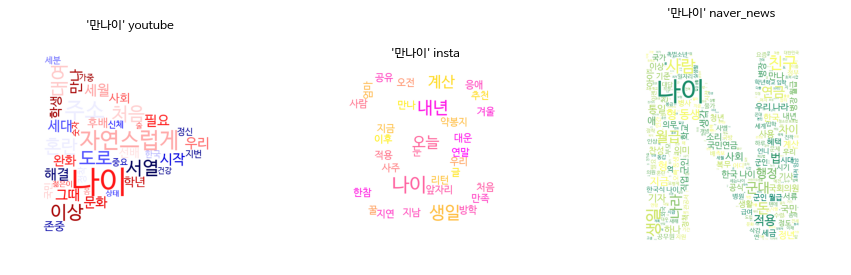

In [112]:
# 워드 클라우드 이미지 (sns 별로)
plt.rcParams["figure.figsize"] = (15,8)
# struct is  [1, 3]
rows = 1
columns = 3
title_list = ['youtube', 'insta', 'naver_news']
for i in range(3) : 
    image_index = i + 1     # image index 
    ttitle = "\'만나이\' " + title_list[i] # image title
    plt.subplot(rows, columns, image_index) # subplot 
    plt.title(ttitle)   # title 
    plt.imshow( wc_gen_list[i] )
    plt.axis('off')
plt.show()

- '만나이' 통합 

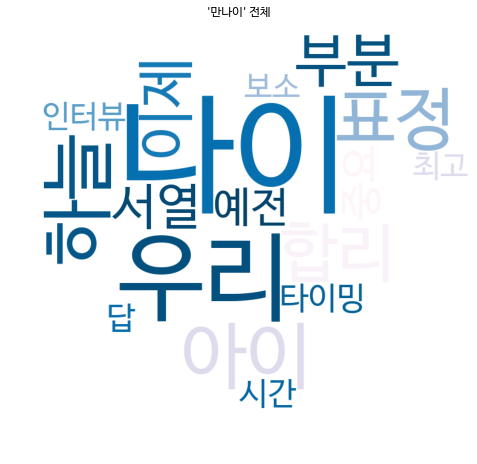

In [113]:
# 워드 클라우드 이미지 (통합)
plt.title("\'만나이\' 전체")  
plt.imshow( wc_gen_list[6] )
plt.axis('off')
# image_name = '/content/' + '만나이_image_' + '통합' + '.png'
# plt.savefig(image_name)  # save
plt.show()

####물가상승

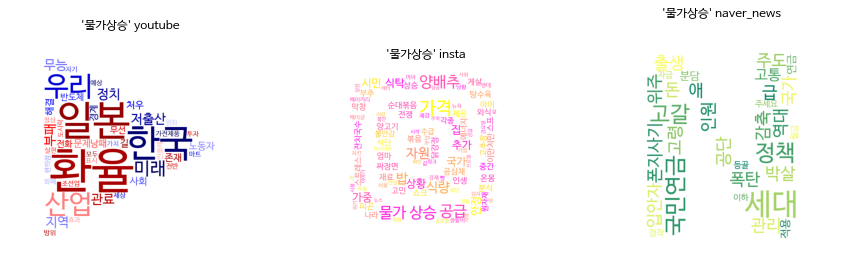

In [114]:
# 워드 클라우드 이미지 (sns 별로)
plt.rcParams["figure.figsize"] = (15,8)
# struct is  [1, 2]
rows = 1
columns = 3
title_list = ['youtube', 'insta', 'naver_news']
for i in range(3) : 
    image_index = i + 1     # image index 
    ttitle = "\'물가상승\' " + title_list[i] # image title
    plt.subplot(rows, columns, image_index) # subplot 
    plt.title(ttitle)   # title 
    plt.imshow( wc_gen_list[i+3] )
    plt.axis('off')
plt.show()

- '물가상승' 통합 

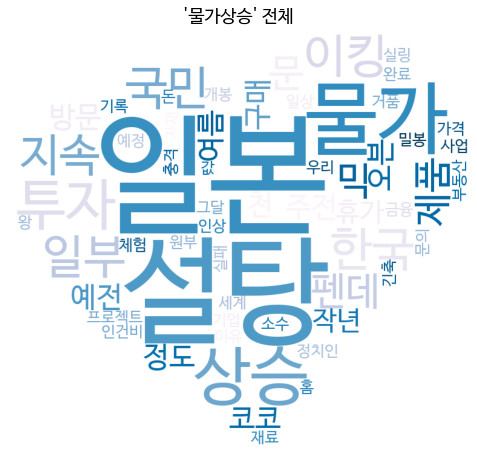

In [211]:
# 워드 클라우드 이미지 (통합)
plt.title("\'물가상승\' 전체")  
plt.imshow( wc_gen_list[7] )
plt.axis('off')
# image_name = '/content/' + '물가상승_image_' + '통합' + '.png'
# plt.savefig(image_name)  # save
plt.show()

####국민연금

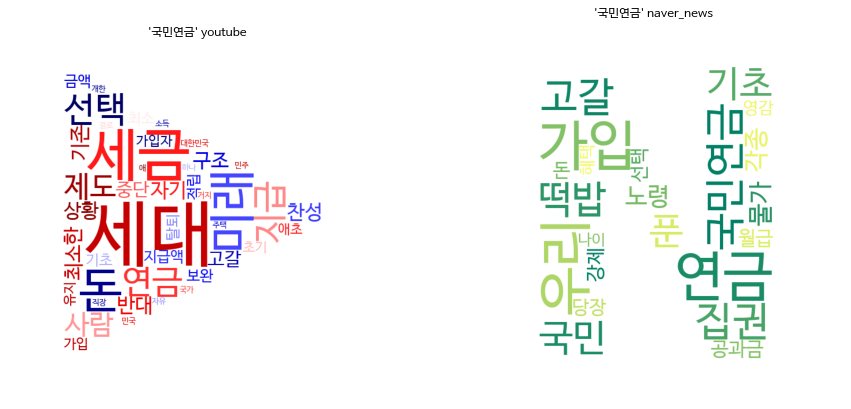

In [116]:
# 워드 클라우드 이미지 (sns 별로)
plt.rcParams["figure.figsize"] = (15,8)
# struct is  [1, 2]
rows = 1
columns = 2
title_list = ['youtube', 'naver_news']
for i in range(2) : 
    image_index = i + 1     # image index 
    ttitle = "\'국민연금\' " + title_list[i] # image title
    plt.subplot(rows, columns, image_index) # subplot 
    plt.title(ttitle)   # title 
    plt.imshow( wc_gen_list[i+8] )
    plt.axis('off')
plt.show()

- '국민연금' 통합 

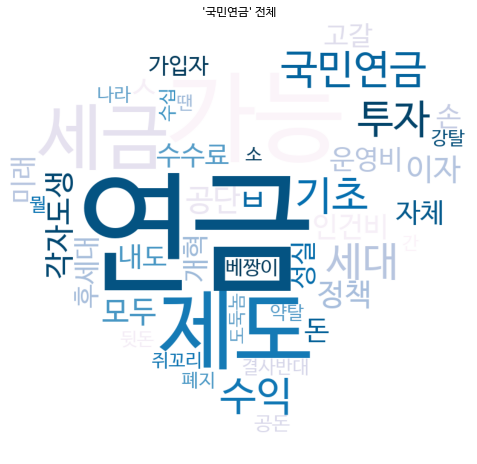

In [117]:
# 워드 클라우드 이미지 (통합)
plt.title("\'국민연금\' 전체")  
plt.imshow( wc_gen_list[10] )
plt.axis('off')
# image_name = '/content/' + '국민연금_image_' + '통합' + '.png'
# plt.savefig(image_name)  # save
plt.show()

### 추가 분석

- 워드클라우드 결과로 나온 연관 키워드가 포함된 좋아요 수 높은 글 도출 
- 인스타는 나이만 뽑아서 연령층 파악


#### 좋아요 수 높은 글 도출

**'만나이'**

In [119]:
youtube_df[youtube_df['댓글내용'].str.contains('나이')].sort_values('좋아요수', ascending=False).head(1)
# 애초에 빠른인 선배한테 말 안까듯이 학생때는 그냥 학년,학번 기준으로 하면 될거고 성인되면 나이가 어떻든 초면에 기본값은 존대여야지ㅋㅋㅋㅋ 말까는건 친해진뒤에 서로 정할일이고 그냥 하던대로 하면 되는거임
# => '나이', '학년', '선배' 핵심 키워드를 찾아 볼 수 있다

,댓글내용,좋아요수,날짜
1142,애초에 빠른인 선배한테 말 안까듯이 학생때는 그냥 학년 학번 기준으로 하면 될거고 ...,5000,202205


In [120]:
insta_df[insta_df['댓글내용'].str.contains('내년')].sort_values('좋아요', ascending=False).head(1)

,댓글내용,날짜,좋아요
1330,흰머리가 점점 늘어가는 와중에 내년 6월부터는 올해보다 나이가 어려질 예정이랍니다 ...,"12월 25, 2022",5928


In [121]:
naver_news_df[naver_news_df['댓글내용'].str.contains('사람')].sort_values('좋아요', ascending=False).head(1)

,시간,댓글내용,좋아요
759,2022.12.06. 19:43,나같이 생일 늦은 사람은 2년을 버네 ㅎㅎㅎ,97


**'물가상승'**

In [122]:
youtube_df_2[youtube_df_2['댓글내용'].str.contains('환율')].sort_values('좋아요수', ascending=False).head(1)

,댓글내용,좋아요수,날짜
434,해법이 없는게 아니라 한은이 부동산 방어한다고 금리를 안올려서 그럼 환율이 작살나니...,129,202210


In [123]:
insta_df_2[insta_df_2['댓글내용'].str.contains('공급')].sort_values('좋아요', ascending=False).head(1)

,댓글내용,날짜,좋아요
468,국내 우유 가격이 더 오를 것으로 예상되면서 빵 과자 등 우유가 들어간 제품 가격이...,"8월 23, 2022",162


In [124]:
naver_news_df_2[naver_news_df_2['댓글내용'].str.contains('국민연금')].sort_values('좋아요', ascending=False).head(1)

,시간,댓글내용,좋아요
0,2023.01.08. 12:10,ㅋㅋㅋ 지금 출생아 수 역대급으로 박살 났는데 국민연금 받는 돈은 계속 오르네 ㅋㅋ...,230


**'국민연금'**

In [214]:
youtube_df_3[youtube_df_3['댓글내용'].str.contains('세대')].sort_values('좋아요수', ascending=False).head(1)

,댓글내용,좋아요수,날짜
1051,지금 국민연금공단이 해야할 일1 더 걷지 말고 강제가입 강제 수금 관두기2 못 받을...,1800,202301


In [215]:
naver_news_df_3[naver_news_df_3['댓글내용'].str.contains('가입')].sort_values('좋아요', ascending=False).head(1)

,시간,댓글내용,좋아요
845,2023.01.10. 12:59,왜 국민연금만 개혁대상이지 공무원 군인 사학연금은 왜 세금으로 운영하면서 개혁을 안...,167


#### 인스타 연령층 파악

- '만나이' 인스타 데이터 기반

In [125]:
p = re.compile('[^0-9]+')   # 숫자만 남김
old = insta_df['댓글내용'].apply(lambda x: p.sub(' ', x))
old

0                         23 
1                      25 98 
2                            
3                            
4                       1026 
                ...          
1482                         
1483                         
1484             34 10 12 35 
1485     23 6 37 36 40 40 40 
1486      30 2 20 3 30 20 30 
Name: 댓글내용, Length: 1487, dtype: object

In [126]:
def reg(t):
    p = re.compile('[0-9]+')    # 숫자만 남기기 
    t = p.findall(t)
    # print(t)
    if t : old_list.extend(t)

old_list = []
old.apply(lambda x : reg((x)))
print(old_list)

['23', '25', '98', '1026', '93715', '10', '80', '20', '88', '20', '30', '2023', '3', '40', '80', '18', '2023', '6', '89', '83', '89', '88', '82', '1', '78', '89', '89', '87', '80', '2', '6', '2023', '2023', '25', '20', '2', '30', '6', '1', '7', '2', '6', '1', '2023', '2023', '2023', '2023', '10', '96', '28', '30', '20', '87', '87', '2023', '2023', '2023', '90', '10', '20', '04', '31', '1', '6', '3', '1', '6', '19', '24', '40', '50', '40', '40', '1', '30', '3', '11', '6', '6', '2', '45', '6', '40', '4', '6', '2023', '6', '1', '2', '9', '160', '9', '620', '5', '3', '2', '1', '1544', '8364', '19', '25', '1', '10', '13', '12', '1', '12', '29', '30', '18', '2023', '19', '30', '2023', '2023', '34', '35', '2023', '50', '50', '29', '2023', '4', '6', '6', '9', '9', '8', '7', '11', '8', '9', '8', '6', '6', '2023', '23', '23', '0126', '2', '47', '26', '25', '24', '26', '25', '24', '45', '10', '7', '13', '20', '5', '2023', '2023', '1', '1', '1', '1', '2023', '29', '1', '30', '30', '29', '6', '4', 

In [127]:
insta_df[insta_df['댓글내용'].str.contains('10')].head(5)

,댓글내용,날짜,좋아요
4,1026 열아홉이닷,"1월 13, 2023",0
7,나의 10대 안녕,"12월 25, 2022",2
50,10년생 안껴주는 거 너무 서운해요,"12월 28, 2022",21
58,10년생은 어딨죠,"12월 27, 2022",2
105,1월 10일 우리 따님 13번째 생일 만나이 없어진다고 12살을 1년 더 보내야 하...,"1월 12, 2023",15


In [128]:
# old_10_count = 0
old_20_count = 0
old_30_count = 0
old_40_count = 0

for i in old_list :
    if len(i) == 2:
        
        # '10년만 어려지면 좋겠다', '12일' 등 10대를 걸러내긴 어려움
        # if i[0] == 1 or 20 > int(i) > 4:
        #     # print(i)
        #     old_10_count += 1
        if i[0] == 2 or int(i) >= 95 or int(i) <= 4:
            # print(i)
            old_20_count += 1
        elif i[0] == 3 or 85 <= int(i) < 95:
            old_30_count += 1
        elif i[0] == 4  or 75 <= int(i) < 85:
            old_40_count += 1  

In [220]:
# 대략 유추해본 인스타 댓글 연령층
insta_age_df = pd.DataFrame({'Age_Count':[old_20_count,old_30_count,old_40_count]}, index=['20대', '30대', '40대'])
insta_age_df

,Age_Count
20대,47
30대,34
40대,24


### 벤다이어그램

- sns 별로 추출한 연관 키워드들 사이 관계

In [130]:
from matplotlib_venn import venn3

##### 만나이

###### 데이터 생성

In [221]:
# word_wc_df_list에 담아놓은 데이터 이용 => set으로 변환
youtube_set = set(word_wc_df_list[0]['word'])
print(youtube_set)
len(youtube_set)

{'만나', '대여', '정착', '주소', '그때', '중요', '후배', '세대', '숫자', '세월', '도로', '사회', '학년', '문화', '신체', '완화', '지번', '몸', '젊은이', '혼란', '해결', '필요', '상태', '선배', '국민', '나이', '건강', '처음', '이상', '서열', '정신', '자연스럽게', '술', '우리', '존중', '한국', '시작', '세분', '가중', '학생'}


40

In [222]:
insta_set = set(word_wc_df_list[1]['word'])
print(insta_set)
len(insta_set)

{'만나', '응애', '오늘', '지남', '꿀', '이후', '한참', '엄마', '앞자리', '내년', '사람', '지연', '방학', '만족', '대운', '약봉지', '지금', '계산', '공유', '눈', '나이', '겨울', '리턴', '처음', '글', '연말', '추천', '적용', '사주', '우리', '생일', '오전'}


32

In [223]:
naver_news_set = set(word_wc_df_list[2]['word'])
print(naver_news_set)
len(naver_news_set)

{'조선', '다음', '정착', '생활', '본인', '보호법 병역법', '출생', '삭감', '병사', '명절', '아이', '엄마', '복지', '하루', '급', '봉급', '청년', '인상', '사회', '반', '존댓말', '학년', '비리', '상승', '개꿀', '도로', '천만', '하네', '의무', '작년', '기업', '고용', '지원금', '이제', '연금', '지원', '다자녀', '이름', '최저 시급', '민간', '체계', '일상 생활', '필요', '의원', '아들', '출산', '인정', '꼬라지', '우리 나라', '시기', '전역', '계산', '뭔가', '일제', '소리', '공약', '뭘', '해', '문제', '얘기', '이상', '국가', '공무원', '청소년 보호법', '기자', '적용', '음력', '자체', '모병제', '홍보', '개판', '정책', '장난', '가정', '존중', '대한민국', '통과', '뉴스', '오빠', '만나', '계급', '형 동생', '건가요', '머', '사병', '일상', '연장', '외국인', '이걸', '정년', '세대', '세월', '기사', '꼴', '올해', '동급생', '형', '사', '초등 학교', '얼마', '제', '교육', '사용', '아기', '부', '개념', '남자', '인간', '처리', '학교', '민생', '한국식 나이', '이젠', '대통령', '의심', '촉법소년', '외국', '시절', '언제', '요즘', '해결', '난리', '친구', '도입', '수준', '무인기', '최저 임금', '날', '국회의원', '책임', '국민', '그건', '일반', '세는나이', '지금', '시행', '누구', '호칭', '자기', '애', '하나', '족보', '중국', '군인 월급', '지급', '병장', '일본', '오', '꼰대', '실생활', '설', '세금', '짓거리', '억', '생일', '일자리', '관련', '한국', '폐지', '지네'

300

In [224]:
# 벤 다이어그램 각 공간마다 넣어줄 데이터 구하기 위한 연산
all_set = youtube_set & insta_set & naver_news_set# youtube-insta-naver_news
youtube_insta_set = youtube_set & insta_set - all_set # youtube-insta
youtube_naver_news_set = youtube_set & naver_news_set - all_set # youtube-naver_news
naver_news_insta_set = naver_news_set & insta_set - all_set # insta-naver_news

# only
youtube_set_only = youtube_set - youtube_insta_set - youtube_naver_news_set - all_set
insta_set_only = insta_set - youtube_insta_set - naver_news_insta_set - all_set
naver_news_set_only = naver_news_set - naver_news_insta_set - youtube_naver_news_set - all_set

- set -> str (for venn)

In [225]:
# 교집합에 속하지 못하는 키워드는 일부만 추출
word_wc_df_list[0] = word_wc_df_list[0].sort_values(by='freq', ascending=False) # 빈도순서대로 진행
youtube_set_only_list = list(youtube_set_only)
youtube_set_only_str = ''
count = 0
for i in word_wc_df_list[0]['word']:
    if i in youtube_set_only_list:
        youtube_set_only_str += (i + '\t') 
        count += 1
        if count == 2 : youtube_set_only_str += '\n\n'
    if count == 4 : break
youtube_set_only_str

'자연스럽게\t대여\t\n\n세분\t신체\t'

In [229]:
word_wc_df_list[1] = word_wc_df_list[1].sort_values(by='freq', ascending=False) # 빈도순서대로 진행
insta_set_only_list = list(insta_set_only)
insta_set_only_str = ''
count = 0
for i in word_wc_df_list[1]['word']:
    if i in insta_set_only_list:
        insta_set_only_str += (i + '\t') 
        count += 1
        if count == 2 : insta_set_only_str += '\n\n'
    if count == 4 : break
insta_set_only_str

'오늘\t대운\t\n\n지연\t앞자리\t'

In [227]:
word_wc_df_list[2] = word_wc_df_list[2].sort_values(by='freq', ascending=False) # 빈도순서대로 진행
naver_news_set_only_list = list(naver_news_set_only)
naver_news_set_only_str = ''
count = 0
for i in word_wc_df_list[2]['word']:
    if i in naver_news_set_only_list:
        naver_news_set_only_str += (i + '\t') 
        count += 1
        if count == 2 : naver_news_set_only_str += '\n\n'
    if count == 4 : break
naver_news_set_only_str

'친구\t월급\t\n\n나라\t돈\t'

In [230]:
youtube_insta_set_list = list(youtube_insta_set)
youtube_insta_set_str = ''
youtube_insta_set_str += '\t'.join(youtube_insta_set_list[:2])
youtube_insta_set_str += '\n\n'
youtube_insta_set_str += '\t'.join(youtube_insta_set_list[2:])

In [231]:
youtube_naver_news_set_list = list(youtube_naver_news_set)
youtube_naver_news_set_str = ''
youtube_naver_news_set_str += '\t'.join(youtube_naver_news_set_list[:3])
youtube_naver_news_set_str += '\n\n'
youtube_naver_news_set_str += '\t'.join(youtube_naver_news_set_list[3:6])
youtube_naver_news_set_str += '\n\n'
youtube_naver_news_set_str += '\t'.join(youtube_naver_news_set_list[6:10])

In [232]:
naver_news_insta_set_list = list(naver_news_insta_set)
naver_news_insta_set_str = ''
naver_news_insta_set_str += '\t'.join(naver_news_insta_set_list[:3])
naver_news_insta_set_str += '\n\n'
naver_news_insta_set_str += '\t'.join(naver_news_insta_set_list[3:6])
naver_news_insta_set_str += '\n\n'
naver_news_insta_set_str += '\t'.join(naver_news_insta_set_list[6:10])

In [233]:
all_set_str = '\n'.join(list(all_set))
all_set_str = all_set_str.replace('만나', '')

###### 시각화

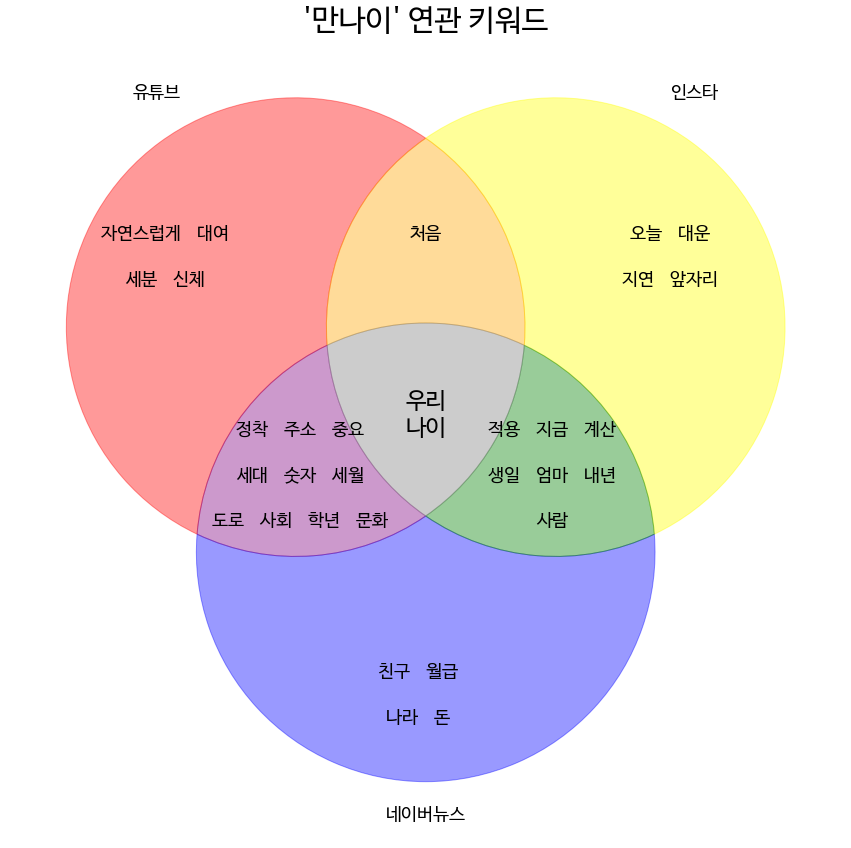

In [234]:
# 벤 다이어그램 나타내기
grp1 = youtube_set
grp2 = insta_set
grp3 = naver_news_set
plt.figure(figsize=(15,15))
font1 = {'family':'NanumBarunGothic','color':'black','size':30} # use for title
font2 = {'family': 'NanumBarunGothic', 'size': 15} 
plt.rc('font', **font2) 

# v3 = venn3([grp1, grp2, grp3],
#            set_labels = ('', '', ''))
v3 = venn3(subsets = {'100':30, '010':30, '110':17,
                      '001':30, '101':17, '011':17, '111':5},
            set_labels = ('유튜브', '인스타', '네이버뉴스'))

# 영역 색상 지정
v3.get_patch_by_id('100').set_color('red')
v3.get_patch_by_id('010').set_color('yellow')
v3.get_patch_by_id('001').set_color('blue')
v3.get_patch_by_id('110').set_color('orange')
v3.get_patch_by_id('101').set_color('purple')
v3.get_patch_by_id('011').set_color('green')
v3.get_patch_by_id('111').set_color('grey')

# 텍스트 삽입 및 폰트 사이즈 조정
v3.get_label_by_id('100').set_text(youtube_set_only_str)
v3.subset_labels[0].set_fontsize(18)
v3.get_label_by_id('010').set_text(insta_set_only_str)
v3.subset_labels[1].set_fontsize(18)
v3.get_label_by_id('001').set_text(naver_news_set_only_str)
v3.subset_labels[3].set_fontsize(18)
v3.get_label_by_id('110').set_text(youtube_insta_set_str)
v3.subset_labels[2].set_fontsize(18)
v3.get_label_by_id('101').set_text(youtube_naver_news_set_str)
v3.subset_labels[4].set_fontsize(18)
v3.get_label_by_id('011').set_text(naver_news_insta_set_str)
v3.subset_labels[5].set_fontsize(18)
v3.get_label_by_id('111').set_text(all_set_str)
v3.subset_labels[6].set_fontsize(23)

image_name = '/content/venn_만나이.png'
plt.savefig(image_name)  # save
plt.title("\'만나이\' 연관 키워드", fontdict=font1)
plt.show()

##### 물가상승

###### 데이터 생성

In [143]:
# word_wc_df_list에 담아놓은 데이터 이용 => set으로 변환
youtube_set = set(word_wc_df_list[3]['word'])
print(youtube_set)
len(youtube_set)

{'산업', '편의점', '지역', '조선업', '마트', '세상', '가전제품', '원화', '사회', '처우', '인플레', '예상', '정치', '전화', '낭패', '전반', '반도체', '경계', '해결', '효과', '저출산', '노동자', '무선', '투자', '실현', '정상', '모두', '방위', '미래', '길', '가치', '표시', '자기', '화폐', '문제', '존재', '일본', '관료', '도시락', '부패', '환율', '무능', '나락', '우리', '한국'}


45

In [144]:
insta_set = set(word_wc_df_list[4]['word'])
print(insta_set)
len(insta_set)

{'게살', '금요일', '양배추', '엄마', '아이', '이야기', '상공', '상승', '인상', '사회', '식탁', '밥', '실감', '물가 상승', '자원', '볶음', '경제', '업자', '링크', '아랍', '스트레스', '국가', '확인', '추가', '값', '순대볶음', '뉴스', '고추장', '가중', '중간', '잔치국수', '에너지', '시절', '스프', '각종', '팬데', '쇼크', '자영', '아프리카', '고민', '식량', '불안', '위기', '체인', '땅', '서울', '재료', '레터', '짜장면', '정성', '집', '전쟁', '부추', '식단', '피곤', '주목', '수급', '공급', '온몸', '생활비', '여파', '양고기', '안정', '상황', '분식', '공심채', '닭강정', '믹', '체감', '글로벌', '기름', '당황', '시민', '시작', '인생', '원자재', '베이글', '뉴욕', '가격', '외식', '빵', '베이커리', '삶', '치킨', '탕수육', '금값', '부담', '이만저만', '막창', '프로필', '불안감', '작용', '제공', '나라', '실화'}


95

In [145]:
naver_news_set = set(word_wc_df_list[5]['word'])
print(naver_news_set)
len(naver_news_set)

{'이하', '위주', '출생', '공단', '세대', '급', '고령', '고통', '월급', '연금', '폰지사기', '주도', '관리', '감축', '분담', '고갈', '애', '입안자', '폭탄', '국가', '역대', '등골', '적용', '인원', '정책', '박살', '자금', '주세요', '국민연금', '돈', '정작'}


31

In [146]:
# 벤 다이어그램 각 공간마다 넣어줄 데이터 구하기 위한 연산
all_set = youtube_set & insta_set & naver_news_set# youtube-insta-naver_news
youtube_insta_set = youtube_set & insta_set - all_set # youtube-insta
youtube_naver_news_set = youtube_set & naver_news_set - all_set # youtube-naver_news
naver_news_insta_set = naver_news_set & insta_set - all_set # insta-naver_news

# only
youtube_set_only = youtube_set - youtube_insta_set - youtube_naver_news_set - all_set
insta_set_only = insta_set - youtube_insta_set - naver_news_insta_set - all_set
naver_news_set_only = naver_news_set - naver_news_insta_set - youtube_naver_news_set - all_set

- set -> str (for venn)

In [147]:
# 교집합에 속하지 못하는 키워드는 일부만 추출
word_wc_df_list[3] = word_wc_df_list[3].sort_values(by='freq', ascending=False) # 빈도순서대로 진행
youtube_set_only_list = list(youtube_set_only)
youtube_set_only_str = ''
count = 0
for i in word_wc_df_list[3]['word']:
    if i in youtube_set_only_list:
        youtube_set_only_str += (i + '\t') 
        count += 1
        if count == 2 : youtube_set_only_str += '\n\n'
    if count == 4 : break
youtube_set_only_str

'환율\t한국\t\n\n일본\t우리\t'

In [148]:
word_wc_df_list[4] = word_wc_df_list[4].sort_values(by='freq', ascending=False) # 빈도순서대로 진행
insta_set_only_list = list(insta_set_only)
insta_set_only_str = ''
count = 0
for i in word_wc_df_list[4]['word']:
    if i in insta_set_only_list:
        insta_set_only_str += (i + '\t') 
        count += 1
        if count == 2 : insta_set_only_str += '\n\n'
    if count == 4 : break
insta_set_only_str

'가격\t양배추\t\n\n물가 상승\t공급\t'

In [149]:
word_wc_df_list[5] = word_wc_df_list[5].sort_values(by='freq', ascending=False) # 빈도순서대로 진행
naver_news_set_only_list = list(naver_news_set_only)
naver_news_set_only_str = ''
count = 0
for i in word_wc_df_list[5]['word']:
    if i in naver_news_set_only_list:
        naver_news_set_only_str += (i + '\t') 
        count += 1
        if count == 2 : naver_news_set_only_str += '\n\n'
    if count == 4 : break
naver_news_set_only_str

'세대\t고갈\t\n\n정책\t국민연금\t'

In [150]:
youtube_insta_set_list = list(youtube_insta_set)
youtube_insta_set_str = ''
youtube_insta_set_str += '\t'.join(youtube_insta_set_list[:2])
youtube_insta_set_str += '\n\n'
youtube_insta_set_str += '\t'.join(youtube_insta_set_list[2:])

In [151]:
youtube_naver_news_set_list = list(youtube_naver_news_set)
youtube_naver_news_set_str = ''
youtube_naver_news_set_str += '\t'.join(youtube_naver_news_set_list[:3])
youtube_naver_news_set_str += '\n\n'
youtube_naver_news_set_str += '\t'.join(youtube_naver_news_set_list[3:6])
youtube_naver_news_set_str += '\n\n'
youtube_naver_news_set_str += '\t'.join(youtube_naver_news_set_list[6:])

In [152]:
naver_news_insta_set_list = list(naver_news_insta_set)
naver_news_insta_set_str = ''
naver_news_insta_set_str += '\t'.join(naver_news_insta_set_list[:3])
naver_news_insta_set_str += '\n\n'
naver_news_insta_set_str += '\t'.join(naver_news_insta_set_list[3:6])
naver_news_insta_set_str += '\n\n'
naver_news_insta_set_str += '\t'.join(naver_news_insta_set_list[6:])

In [153]:
all_set_str = '\n'.join(list(all_set))

###### 시각화

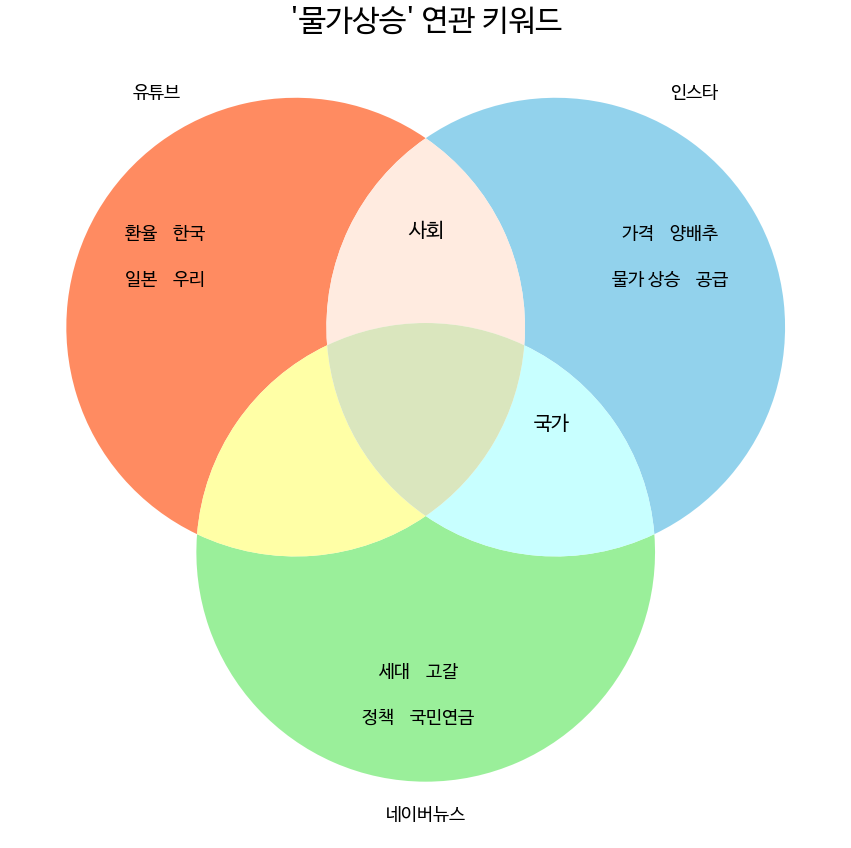

In [154]:
# 벤 다이어그램 나타내기
grp1 = youtube_set
grp2 = insta_set
grp3 = naver_news_set
plt.figure(figsize=(15,15))
font1 = {'family':'NanumBarunGothic','color':'black','size':30} # use for title
font2 = {'family': 'NanumBarunGothic', 'size': 15} 
plt.rc('font', **font2) 
# plt.rcParams['text.color'] = 'darkred'

# v3 = venn3([grp1, grp2, grp3],
#            set_labels = ('', '', ''))
v3 = venn3(subsets = {'100':30, '010':30, '110':17,
                      '001':30, '101':17, '011':17, '111':5},
            set_labels = ('유튜브', '인스타', '네이버뉴스'),
            set_colors=("coral", "skyblue", "lightgreen"), alpha=0.9)

# 텍스트 삽입 및 폰트 사이즈 조정
v3.get_label_by_id('100').set_text(youtube_set_only_str)
v3.subset_labels[0].set_fontsize(18)
v3.get_label_by_id('010').set_text(insta_set_only_str)
v3.subset_labels[1].set_fontsize(18)
v3.get_label_by_id('001').set_text(naver_news_set_only_str)
v3.subset_labels[3].set_fontsize(18)
v3.get_label_by_id('110').set_text(youtube_insta_set_str)
v3.subset_labels[2].set_fontsize(20)
v3.get_label_by_id('101').set_text(youtube_naver_news_set_str)
v3.subset_labels[4].set_fontsize(20)
v3.get_label_by_id('011').set_text(naver_news_insta_set_str)
v3.subset_labels[5].set_fontsize(20)
v3.get_label_by_id('111').set_text(all_set_str)
v3.subset_labels[6].set_fontsize(25)

image_name = '/content/venn_물가상승.png'
plt.savefig(image_name)  # save
plt.title("\'물가상승\' 연관 키워드", fontdict=font1)
plt.show()

### 버블차트

- 글의 좋아요수와 핵심 키워드 관계 분석

#### 만나이

##### 데이터 생성

- 통합 df 생성 (youtube 데이터 형식에 맞춰 정제 및 column 'sns' 추가)

In [155]:
# youtube
youtube_df.head(2)

,댓글내용,좋아요수,날짜
0,처음에는 혼란스러운게 당연하다 하지만 세월이 지나면 자연스럽게 해결되고 좋아질것이다...,3300,202205
1,만나이로 바껴서 좀 한살한살 따지며 서열따지는 문화좀 완화 되었으면 사실 나이들어보...,484,202205


In [156]:
youtube_df['sns'] = 'youtube'   # 새로운 column 추가

In [157]:
# insta
insta_df.head(2)

,댓글내용,날짜,좋아요
0,23년도 만나이 계산 내년엔 나이 안먹는다 오늘의 꿀팁은 공감 공감글 추천 꿀팁 공...,"1월 13, 2023",418
1,다시 리턴해서 25살이 된 98년생 응애,"1월 13, 2023",0


In [158]:
insta_df = insta_df[['댓글내용', '좋아요', '날짜']]

In [159]:
insta_df.rename(columns = {'좋아요' : '좋아요수'}, inplace = True)

In [160]:
def change_date(t):
    y = t[-4:]
    m, _ = t.split('월')
    if len(m) == 1 : m = '0' + m
    return y+m

insta_df['날짜'] = insta_df['날짜'].apply(lambda x: change_date(x))
insta_df['날짜']

0       202301
1       202301
2       202301
3       202301
4       202301
         ...  
1482    202212
1483    202212
1484    202212
1485    202212
1486    202212
Name: 날짜, Length: 1487, dtype: object

In [161]:
insta_df['sns'] = 'insta'

In [162]:
# naver_news
naver_news_df.head(2)

,시간,댓글내용,좋아요
0,2022.12.27. 11:08,우리나라만 나이계산법이 달랐는데 드디어 없어지는구나,534
1,2022.12.27. 11:14,미개한 중국식 설명절도 없애자 새해 한두달 지나서 또 새해복 쇼하는것도 웃기지 않냐...,328


In [163]:
naver_news_df = naver_news_df[['댓글내용', '좋아요', '시간']]

In [164]:
naver_news_df.rename(columns = {'좋아요' : '좋아요수'}, inplace = True)

In [165]:
naver_news_df.rename(columns = {'시간' : '날짜'}, inplace = True)

In [166]:
naver_news_df['날짜'] = naver_news_df['날짜'].apply(lambda x: x[:4] + x[5:7])
naver_news_df['날짜']

0      202212
1      202212
2      202212
3      202212
4      202212
        ...  
816    202212
817    202212
818    202212
819    202212
820    202212
Name: 날짜, Length: 821, dtype: object

In [167]:
naver_news_df['sns'] = 'naver_news'

In [168]:
# 데이터 합본 생성
all_df_1 = pd.concat([youtube_df, insta_df, naver_news_df], ignore_index=True)

In [169]:
tmp = all_df_1[all_df_1['좋아요수']==0].index.tolist()
all_df_1.drop(tmp, inplace=True)

In [170]:
# 좋아요수 높은 순으로 정렬
all_df_1.sort_values(by=['좋아요수'], ascending=False, ignore_index=True)

,댓글내용,좋아요수,날짜,sns
0,잘가 20대,16000,202212,insta
1,4년생들은 앞자리 바뀐다 한국식 나이 없어지고 드디어 만 나이 로 통일 만나이 만나...,9613,202301,insta
2,흰머리가 점점 늘어가는 와중에 내년 6월부터는 올해보다 나이가 어려질 예정이랍니다 ...,5928,202212,insta
3,왜 10년생 이하는 없죠 10년생도 이제 중학생 되는데 끼워줄 때 됐잖아요,5716,202212,insta
4,애초에 빠른인 선배한테 말 안까듯이 학생때는 그냥 학년 학번 기준으로 하면 될거고 ...,5000,202205,youtube
...,...,...,...,...
3470,반드시해야 할일이지요,1,202210,youtube
3471,ㅋㅋㅋㅋ아침먹을때만해도 얼딥 안간다던 딸 뒤도 안돌아보고 가더라고요ㅋㅋㅋㅋ아침마다 ...,1,202301,insta
3472,등원 부럽네여 전 수욜 개학이라ㅠ 오랜만에 등원이라 울었나 키즈노트는 반전,1,202301,insta
3473,역시 등원하면 누구보다 잘 노는거죠 오랜만에 등원이 힘들었지만 잘 들어가서 신나게 ...,1,202301,insta


##### 시각화

In [171]:
# 사전으로 word_wc_df_list 이용
vocab = word_wc_df_list[6]['word']

In [172]:
# 댓글 안에 연관 키워드 개수 측정 
all_df_1['키워드개수'] = 0

for i in range(len(all_df_1)):
    for k in vocab:
        all_df_1['키워드개수'].iloc[i] += all_df_1['댓글내용'].iloc[i].count(k)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [173]:
all_df_1['날짜'] = all_df_1['날짜'].astype('int')

In [174]:
import plotly.express as px

fig = px.scatter(data_frame=all_df_1, x="키워드개수", y="좋아요수",
	         size="날짜", color="sns")
fig.show()
# 키워드 개수에 따른 좋아요수를 나타내는 버블 차트

=> 좋아요수가 높은 글이 반드시 핵심 키워드를 갖진 않는다

### NetworkX

#### 만나이

- '만나이' 연관 키워드들 관계 시각화

In [175]:
# 댓글내용 통합 (mecab 데이터 기반)
text_all = pd.concat([youtube_data_mecab['댓글내용'], insta_data_mecab['댓글내용'], naver_news_data_mecab['댓글내용']], ignore_index=True)

In [176]:
dataset = []
# 제외할 단어 지정
stopwords2 = ['','만', '일', '것', '게', '때문', '때', '월', '듯', '대', '내', '세', '것', '이', '일', '거', '건', '데', '댓글', '작성자', '삭제', '그램', '스타', '저']
# 2차원 배열 생성
for i in text_all:
    i = i.replace('만나', '만나이')
    dataset.append([])
    for t in i.split():
        if t in stopwords2 : continue
        dataset[-1].append(t)
    if not dataset[-1] :
        dataset.pop(-1)
print(dataset[:10])

[['처음', '혼란', '세월', '자연스럽게', '해결', '우리', '세대', '그때', '시작', '필요'], ['만나이', '이로', '바', '살', '살', '서열', '문화', '완화', '나이', '나이', '말', '학생', '학년', '선배', '후배', '사회', '존중', '이상'], ['처음', '지번', '주소', '도로', '주소', '국민', '혼란', '도로', '주소', '자연스럽게', '나이', '자연스럽게', '정착'], ['가족', '혈연관계', '형', '언니', '누나', '오빠', '호칭', '사용', '서양', '수평', '문화', '형성', '선배', '후배', '선임', '후임', '표현법', '사용', '나', '성명', '식', '바', '생각'], ['합리', '살', '부분', '이제', '나이', '서열', '예전', '중요', '타이밍'], ['이건', '생각', '건데', '세계', '우리', '나라', '언어', '나이', '곳', '나이', '언어', '언어', '나이', '덕', '유', '우리', '문화', '발전', '기여', '중간', '세계', '우리'], ['나이', '살', '년', '질문', '현명', '질문'], ['세월', '만나이', '한국식', '나이', '나이', '나이', '중요', '시간', '그건', '아무것', '현실', '나이', '날', '계산', '수', '나이'], ['손', '혜택'], ['좌측', '보행', '우측', '보행', '말', '혼란', '정착', '나이', '정착']]


In [177]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
# apriori 알고리즘 적용하여 연관규칙 분석 수행
from apyori import apriori
# 지지도(support) : P(A∩B)
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
        (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)

,items,support,ordered_statistics,length
120,"(나이, 살)",0.079118,"[((), (나이, 살), 0.07911776608660462, 1.0), ((나이...",2
112,"(나이, 년)",0.071226,"[((), (나이, 년), 0.07122622420072845, 1.0), ((나이...",2
149,"(살, 년)",0.054634,"[((), (살, 년), 0.05463375151760421, 1.0), ((년),...",2
138,"(나이, 한국)",0.035815,"[((), (나이, 한국), 0.035815459328207205, 1.0), ((...",2
134,"(친구, 나이)",0.035613,"[((), (친구, 나이), 0.035613112100364226, 1.0), ((...",2
123,"(나이, 생일)",0.034197,"[((), (나이, 생일), 0.03419668150546337, 1.0), ((나...",2
176,"(살, 생일)",0.033792,"[((), (살, 생일), 0.03379198704977742, 1.0), ((살)...",2
129,"(우리, 나이)",0.032578,"[((), (우리, 나이), 0.032577903682719546, 1.0), ((...",2
118,"(나이, 사람)",0.031769,"[((), (나이, 사람), 0.03176851477134763, 1.0), ((나...",2
166,"(동생, 형)",0.030959,"[((), (동생, 형), 0.03095912585997572, 1.0), ((동생...",2


In [179]:
!pip install 'networkx<2.7'     # 페이지랭크 생성 오류 해결을 위해 버전지정

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

In [181]:
# 페이지랭크 (노드 순위를 제공)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [182]:
# 레이아웃
pos = nx.fruchterman_reingold_layout(G)

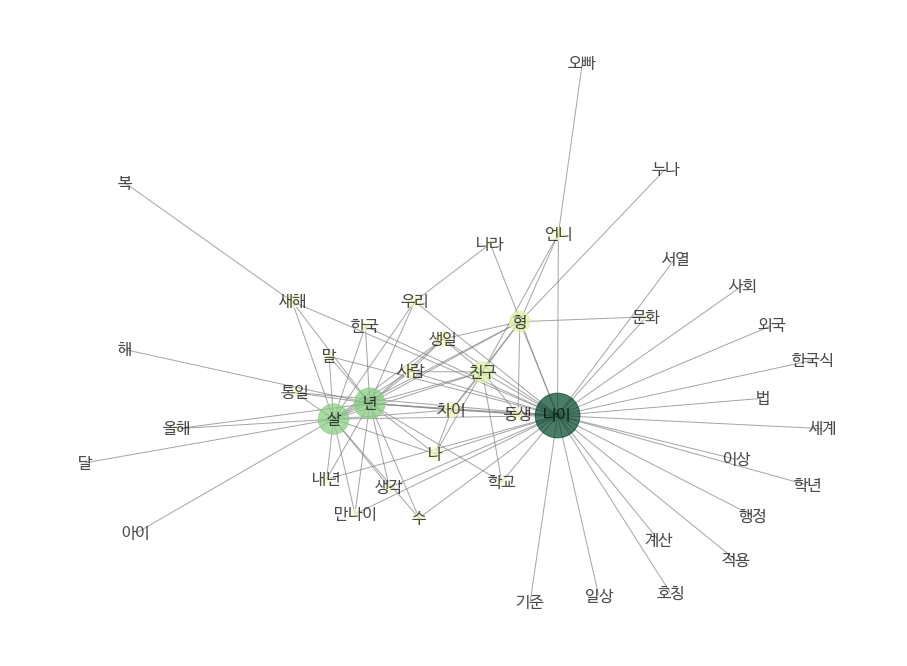

In [183]:
# 네트워크 그래프
plt.figure(figsize=(16, 12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)
plt.savefig('/content/networkx_만나이.png', bbox_inches='tight')

#### 물가상승

- '물가상승' 연관 키워드들 관계 시각화

In [184]:
# 댓글내용 통합 (mecab 데이터 기반)
text_all = pd.concat([youtube_data_mecab_2['댓글내용'], insta_data_mecab_2['댓글내용'], naver_news_data_mecab_2['댓글내용']], ignore_index=True)

In [185]:
dataset = []
# 제외할 단어 지정
stopwords2 = stopwords2 + list(stopwords) + ['편의점', '도시락', '번']
# 2차원 배열 생성
for i in text_all:
    dataset.append([])
    for t in i.split():
        if t in stopwords2 : continue
        dataset[-1].append(t)
    if not dataset[-1] :
        dataset.pop(-1)
print(dataset[:10])

[['우리', '미래', '저출산', '무능', '정치', '지역', '부패', '관료', '노동자', '처우', '사회', '존재', '문제', '해결', '우리', '나락', '길'], ['일본', '낭패', '한국', '경계', '한국', '산업', '반도체', '무선', '전화', '가전제품', '조선업', '방위', '산업', '전반'], ['환율', '정상', '모두', '환율', '예상', '자기', '실현', '효과', '환율', '원화', '표시', '환율', '투자'], ['인구', '절벽', '극복', '우리', '경제', '순간'], ['일본', '추월', '일본', '행보', '느낌', '우리', '걱정'], ['인구', '관련', '얘기', '고령', '인구', '일본', '인구', '배', '인구', '문제', '해결', '일본', '동안', '겁니다'], ['일본', '신경', '우리', '가계', '부채', '수천', '조', '거기', '국가', '부채', '일본', '평가', '우리'], ['일본', '무역', '수지', '자본', '수지', '나라', '무역', '수지', '자본', '수지', '균형', '일본', '수출품', '경쟁력', '아베노', '믹스', '이전', '대비', '생각', '일본', '상황', '밑바닥', '가정', '우리', '나라', '출산', '반'], ['잠시', '방심', '오만', '금물', '분발'], ['일본', '물가', '한국', '간', '생활', '물가', '배', '이상', '서민', '생활', '안정', '최저', '임금', '형태', '일본', '월급', '우리', '나라', '최저', '임금', '폭', '물가', '시작', '체감', '입장', '생각', '우리', '나라', '식료품', '필수', '생활품', '물가', '임금', '대비', '일본']]


In [186]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
# apriori 알고리즘 적용하여 연관규칙 분석 수행
from apyori import apriori
# 지지도(support) : P(A∩B)
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
        (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)

,items,support,ordered_statistics,length
144,"(물가, 상승)",0.090670,"[((), (물가, 상승), 0.09067017082785808, 1.0), ((물...",2
115,"(물가, 가격)",0.039203,"[((), (물가, 가격), 0.03920280332895313, 1.0), ((가...",2
128,"(금리, 물가)",0.036137,"[((), (금리, 물가), 0.03613666228646518, 1.0), ((금...",2
152,"(물가, 인상)",0.031756,"[((), (물가, 인상), 0.03175646079719667, 1.0), ((물...",2
136,"(우리, 나라)",0.030661,"[((), (우리, 나라), 0.030661410424879545, 1.0), ((...",2
116,"(가격, 상승)",0.028690,"[((), (가격, 상승), 0.028690319754708718, 1.0), ((...",2
122,"(물가, 경제)",0.026938,"[((), (물가, 경제), 0.026938239159001315, 1.0), ((...",2
151,"(물가, 월급)",0.024748,"[((), (물가, 월급), 0.02474813841436706, 1.0), ((물...",2
118,"(물가, 값)",0.023653,"[((), (물가, 값), 0.023653088042049936, 1.0), ((값...",2
160,"(상승, 인상)",0.023653,"[((), (상승, 인상), 0.023653088042049936, 1.0), ((...",2


In [188]:
!pip install 'networkx<2.7'     # 페이지랭크 생성 오류 해결을 위해 버전지정

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

In [190]:
# 페이지랭크 (노드 순위를 제공)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [191]:
# 레이아웃
pos = nx.fruchterman_reingold_layout(G)

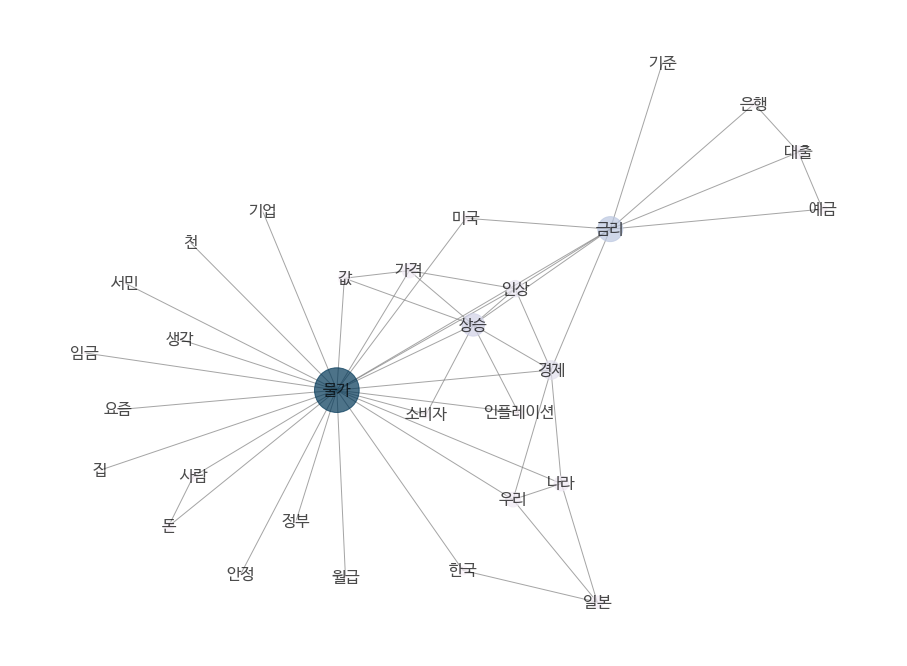

In [192]:
# 네트워크 그래프
plt.figure(figsize=(16, 12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.PuBu)
plt.savefig('/content/networkx_물가상승.png', bbox_inches='tight')

### 기타 시각자료

- 세대별 SNS 이용 추이
- 데이터 출처 : https://www.hankyung.com/it/article/202206213986Y

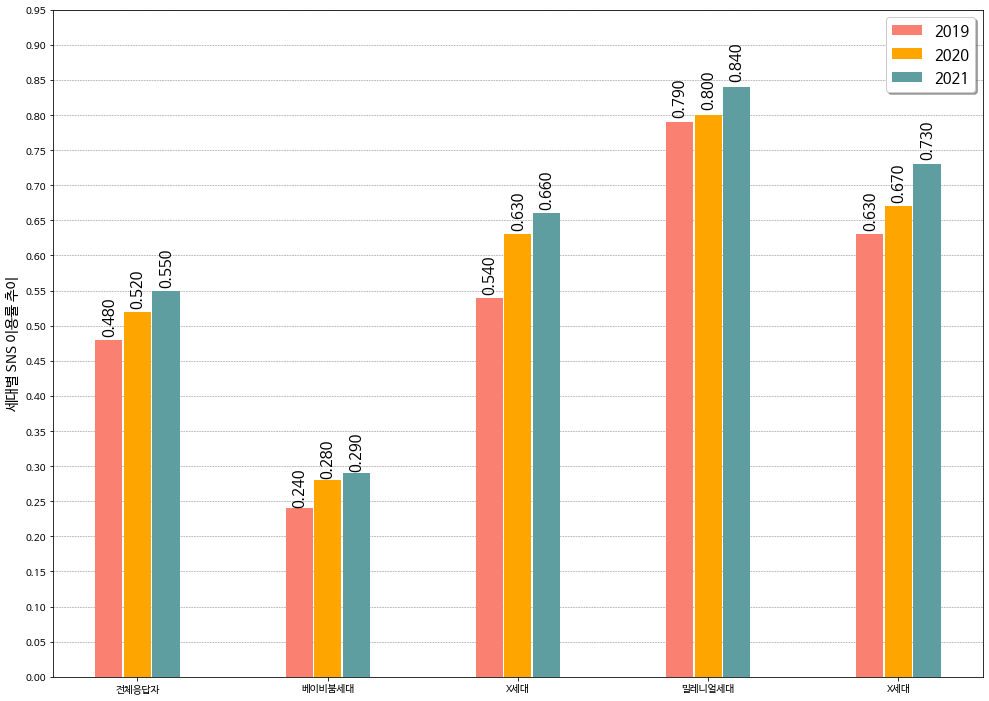

In [194]:
import matplotlib.pyplot as plt
import numpy as np

def main():
	#### 1. bar plot으로 나타낼 데이터 입력
	models = ['2019', '2020', '2021']
	xticks = ['전체응답자', '베이비붐세대', 'X세대', '밀레니얼세대', 'X세대']
	data = {'2019':[0.48, 0.24, 0.54, 0.79, 0.63],
	        '2020':[0.52, 0.28, 0.63, 0.80, 0.67],
	    		'2021':[0.55, 0.29, 0.66, 0.84, 0.73]}
	
	#### 2. matplotlib의 figure 및 axis 설정
	fig, ax = plt.subplots(1,1,figsize=(14,10)) # 1x1 figure matrix 생성, 가로(14인치)x세로(10인치) 크기지정
	colors = ['salmon', 'orange', 'cadetblue', 'skyblue']
	width = 0.15
	
	#### 3. bar 그리기
	for i, model in enumerate(models):
		pos = compute_pos(xticks, width, i, models)
		bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
		present_height(ax, bar) # bar높이 출력
	
	#### 4. x축 세부설정
	ax.set_xticks(range(len(xticks)))
	ax.set_xticklabels(xticks, fontsize=10)	
	
	#### 5. y축 세부설정
	ax.set_ylim([0.5,0.76])
	ax.set_yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,0.85,0.9,0.95])
	ax.yaxis.set_tick_params(labelsize=10)
	ax.set_ylabel('세대별 SNS 이용률 추이', fontsize=14)
	
	#### 6. 범례 나타내기
	ax.legend(loc='upper right', shadow=True, ncol=1)
	
	#### 7. 보조선(눈금선) 나타내기
	ax.set_axisbelow(True)
	ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
	
	#### 8. 그래프 저장하고 출력하기
	plt.tight_layout()
	plt.savefig('ex_barplot.png', format='png', dpi=300)
	plt.show()
	
def compute_pos(xticks, width, i, models):
  index = np.arange(len(xticks))
  n = len(models)
  correction = i-0.5*(n-1)
  return index + width*correction

def present_height(ax, bar):
	for rect in bar:
		height = rect.get_height()
		posx = rect.get_x()+rect.get_width()*0.5
		posy = height*1.01
		ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')
		
if __name__=='__main__':
	main()